In [7]:
from rdkit import Chem
from rdkit.Chem import Draw
import pandas as pd

In [7]:
print(pd.__version__)
print(rdkit.__version__) # НА ДРУГИХ НЕ РАБОТАЛ Pandas  и соответвенно PandasTools

1.1.5
2020.09.1


In [3]:
help(Chem.MolFromSmiles) # так как он толко строки принимает то скормить ему много  
                         #  файлов можно только черезгенератор списков, как мне кажется.

Help on built-in function MolFromSmiles in module rdkit.Chem.rdmolfiles:

MolFromSmiles(...)
    MolFromSmiles( (object)SMILES, (SmilesParserParams)params) -> Mol :
        Construct a molecule from a SMILES string.
        
             ARGUMENTS:
           
               - SMILES: the smiles string
           
               - params: used to provide optional parameters for the SMILES parsing
           
             RETURNS:
           
               a Mol object, None on failure.
           
        
    
        C++ signature :
            RDKit::ROMol* MolFromSmiles(boost::python::api::object,RDKit::SmilesParserParams)
    
    MolFromSmiles( (object)SMILES [, (bool)sanitize=True [, (dict)replacements={}]]) -> Mol :
        Construct a molecule from a SMILES string.
        
          ARGUMENTS:
        
            - SMILES: the smiles string
        
            - sanitize: (optional) toggles sanitization of the molecule.
              Defaults to True.
        
            

In [8]:
smiles = ["c1ccccc1", "n1cncnc1"]

In [9]:
mols = Chem.MolFromSmiles(smiles)

TypeError: No registered converter was able to produce a C++ rvalue of type std::__cxx11::basic_string<wchar_t, std::char_traits<wchar_t>, std::allocator<wchar_t> > from this Python object of type list

In [10]:
mols = [Chem.MolFromSmiles(i) for i in smiles]

In [11]:
mols

In [12]:
help(Draw.MolsToImage) # Принимает срузу все в списке

Help on function MolsToImage in module rdkit.Chem.Draw:

MolsToImage(mols, subImgSize=(200, 200), legends=None, **kwargs)



In [10]:
help(Draw.MolToImage) #Принимает тольео одну молекулу

Help on function MolToImage in module rdkit.Chem.Draw:

MolToImage(mol, size=(300, 300), kekulize=True, wedgeBonds=True, fitImage=False, options=None, canvas=None, **kwargs)
    Returns a PIL image containing a drawing of the molecule
    
    ARGUMENTS:
    
      - kekulize: run kekulization routine on input `mol` (default True)
    
      - size: final image size, in pixel (default (300,300))
    
      - wedgeBonds: draw wedge (stereo) bonds (default True)
    
      - highlightAtoms: list of atoms to highlight (default [])
    
      - highlightMap: dictionary of (atom, color) pairs (default None)
    
      - highlightBonds: list of bonds to highlight (default [])
    
      - highlightColor: RGB color as tuple (default [1, 0, 0])
    
    NOTE:
    
          use 'matplotlib.colors.to_rgb()' to convert string and
          HTML color codes into the RGB tuple representation, eg.
    
            from matplotlib.colors import ColorConverter
            img = Draw.MolToImage(m, hig

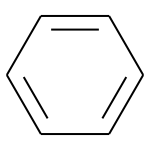

In [14]:
Draw.MolToImage(mols[0], size=(150,150))

Тут почему то аргумент для размера молекулы не subImgSize, а просто size

In [15]:
help(Draw.MolsToGridImage) 

Help on function ShowMols in module rdkit.Chem.Draw.IPythonConsole:

ShowMols(mols, maxMols=50, **kwargs)



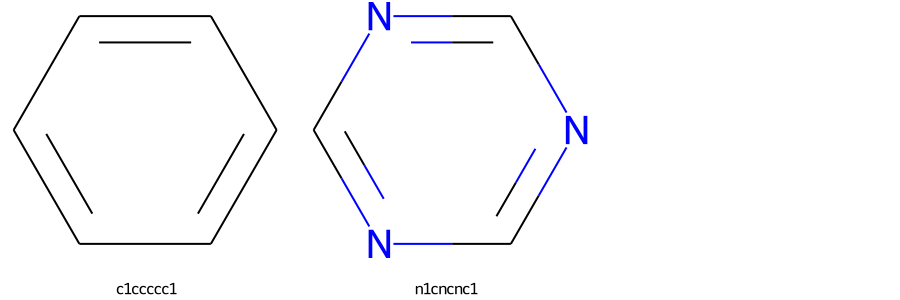

In [16]:
Draw.MolsToGridImage(mols, subImgSize = (300,300), legends = smiles)

In [17]:
mols

In [18]:
mols[0] is None

False

In [19]:
mols.append(Chem.MolFromSmiles("c1ccc")) # При том что он не смог создать класс молекулы он запишет тутда None

RDKit ERROR: [23:31:24] SMILES Parse Error: unclosed ring for input: 'c1ccc'
[23:31:24] SMILES Parse Error: unclosed ring for input: 'c1ccc'


In [20]:
len(mols)

3

In [21]:
mols[2] is None

True

In [22]:
?Chem.SDMolSupplier

In [23]:
mols = [x for x in Chem.SDMolSupplier(r"/home/aster/Загрузки/Telegram Desktop/example_compounds.sdf")]

In [24]:
mols

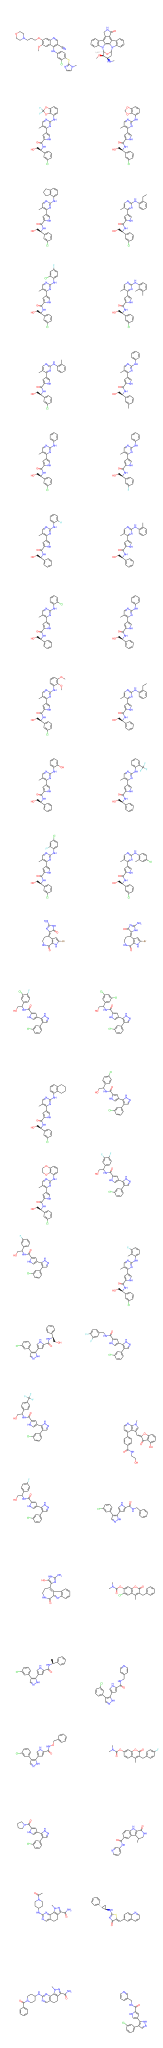

In [28]:
Draw.MolsToGridImage(mols, molsPerRow=2, subImgSize=(500, 500), useSVG=True)


>rdkit.Chem.Draw.MolsToGridImage(mols, molsPerRow=3, subImgSize=200, 200, legends=None, highlightAtomLists=None, highlightBondLists=None, useSVG=False, returnPNG=False, **kwargs)

> При работе с sdf файлами можно использовать встроенный в rdkit **PandasTools**


In [116]:
from rdkit.Chem import PandasTools

In [117]:
help(PandasTools.LoadSDF)

Help on function LoadSDF in module rdkit.Chem.PandasTools:

LoadSDF(filename, idName='ID', molColName='ROMol', includeFingerprints=False, isomericSmiles=True, smilesName=None, embedProps=False, removeHs=True, strictParsing=True)
    Read file in SDF format and return as Pandas data frame.
    If embedProps=True all properties also get embedded in Mol objects in the molecule column.
    If molColName=None molecules would not be present in resulting DataFrame (only properties
    would be read).



> Importing pandasTools enables several features that allow for using RDKit molecules as columns of a Pandas dataframe. If the dataframe is containing a molecule format in a column (e.g. smiles)

In [118]:
sdf_df = PandasTools.LoadSDF(r"/home/aster/Загрузки/Telegram Desktop/example_compounds.sdf", 
                              idName='ID', 
                              molColName='ROMol' )


ID                                              ROMol
0    168691 CHEMBL318804  <img data-content="rdkit/molecule" src="data:i...
1        86358 CHEMBL162  <img data-content="rdkit/molecule" src="data:i...
2    575087 CHEMBL576683  <img data-content="rdkit/molecule" src="data:i...
3    575065 CHEMBL571484  <img data-content="rdkit/molecule" src="data:i...
4    575047 CHEMBL568937  <img data-content="rdkit/molecule" src="data:i...
5    575012 CHEMBL571056  <img data-content="rdkit/molecule" src="data:i...
6    574947 CHEMBL583042  <img data-content="rdkit/molecule" src="data:i...
7    574890 CHEMBL572157  <img data-content="rdkit/molecule" src="data:i...
8    574823 CHEMBL571031  <img data-content="rdkit/molecule" src="data:i...
9    574810 CHEMBL565460  <img data-content="rdkit/molecule" src="data:i...
10   574805 CHEMBL577193  <img data-content="rdkit/molecule" src="data:i...
11   574889 CHEMBL569869  <img data-content="rdkit/molecule" src="data:i...
12   574780 CHEMBL572162  <img data-content="rdkit/molecule" src="data:i...
13   574880 CHEMBL584754  <img data-content="rdkit/molecule" src="data:i...
14   574838 CHEMBL571038  <img data-content="rdkit/molecule" src="data:i...
15   574809 CHEMBL565459  <img data-content="rdkit/molecule" src="data:i...
16   574964 CHEMBL569181  <img data-content="rdkit/molecule" src="data:i...
17   574881 CHEMBL572361  <img data-content="rdkit/molecule" src="data:i...
18   574870 CHEMBL570366  <img data-content="rdkit/molecule" src="data:i...
19   574822 CHEMBL571030  <img data-content="rdkit/molecule" src="data:i...
20   574963 CHEMBL576048  <img data-content="rdkit/molecule" src="data:i...
21   574936 CHEMBL568483  <img data-content="rdkit/molecule" src="data:i...
22   250364 CHEMBL359106  <img data-content="rdkit/molecule" src="data:i...
23   307979 CHEMBL361708  <img data-content="rdkit/molecule" src="data:i...
24   370070 CHEMBL220054  <img data-content="rdkit/molecule" src="data:i...
25   370069 CHEMBL220897  <img data-content="rdkit/molecule" src="data:i...
26   575055 CHEMBL570111  <img data-content="rdkit/molecule" src="data:i...
27   370040 CHEMBL375544  <img data-content="rdkit/molecule" src="data:i...
28   574915 CHEMBL571722  <img data-content="rdkit/molecule" src="data:i...
29   370065 CHEMBL219790  <img data-content="rdkit/molecule" src="data:i...
30   370057 CHEMBL219849  <img data-content="rdkit/molecule" src="data:i...
31   574905 CHEMBL582829  <img data-content="rdkit/molecule" src="data:i...
32   370099 CHEMBL220112  <img data-content="rdkit/molecule" src="data:i...
33   370039 CHEMBL222249  <img data-content="rdkit/molecule" src="data:i...
34   370046 CHEMBL222465  <img data-content="rdkit/molecule" src="data:i...
35  620576 CHEMBL1092754  <img data-content="rdkit/molecule" src="data:i...
36   370035 CHEMBL374677  <img data-content="rdkit/molecule" src="data:i...
37   370129 CHEMBL220320  <img data-content="rdkit/molecule" src="data:i...
38   201833 CHEMBL332551  <img data-content="rdkit/molecule" src="data:i...
39    126856 CHEMBL80837  <img data-content="rdkit/molecule" src="data:i...
40   370068 CHEMBL373628  <img data-content="rdkit/molecule" src="data:i...
41   370032 CHEMBL221109  <img data-content="rdkit/molecule" src="data:i...
42   370062 CHEMBL220272  <img data-content="rdkit/molecule" src="data:i...
43    127465 CHEMBL78779  <img data-content="rdkit/molecule" src="data:i...
44   370082 CHEMBL220110  <img data-content="rdkit/molecule" src="data:i...
45   412025 CHEMBL437943  <img data-content="rdkit/molecule" src="data:i...
46   603516 CHEMBL599224  <img data-content="rdkit/molecule" src="data:i...
47   395709 CHEMBL235345  <img data-content="rdkit/molecule" src="data:i...
48   603518 CHEMBL599428  <img data-content="rdkit/molecule" src="data:i...
49   370024 CHEMBL220343  <img data-content="rdkit/molecule" src="data:i...
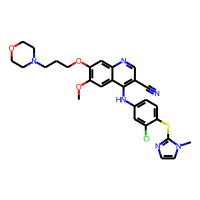
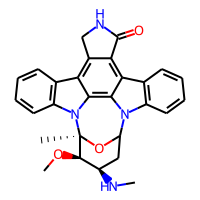
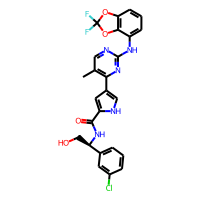
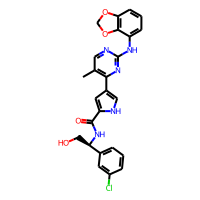
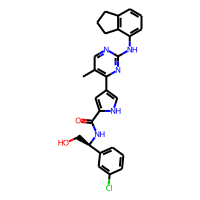
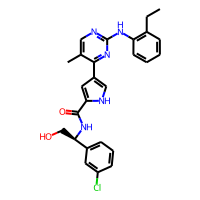
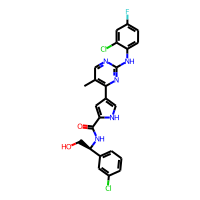
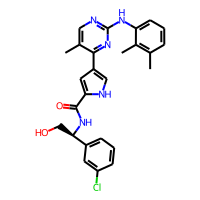
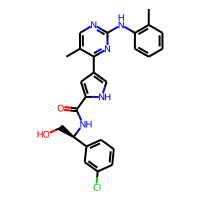
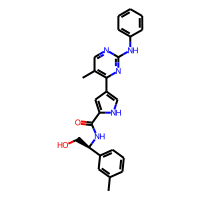
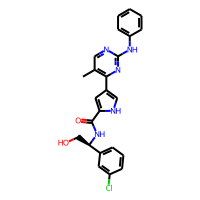
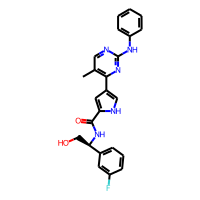
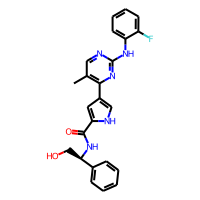
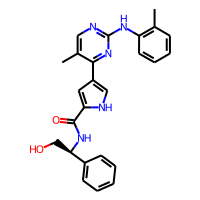
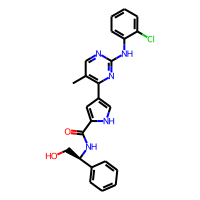
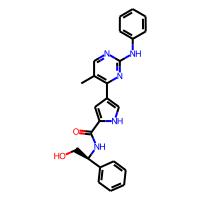
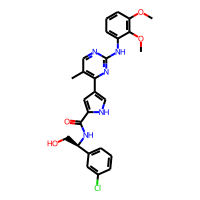
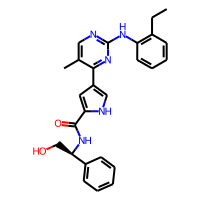
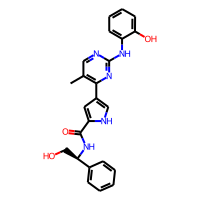
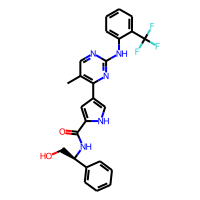
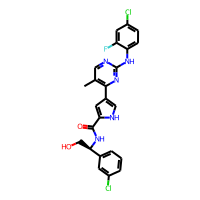
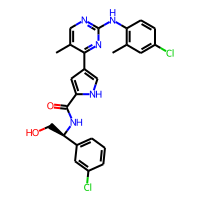
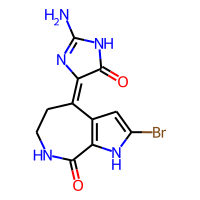
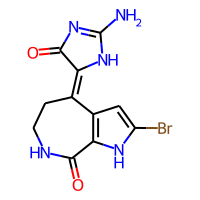
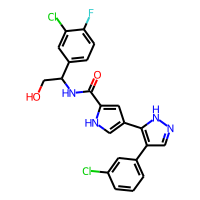
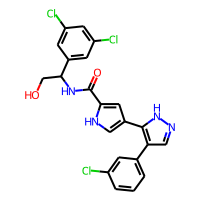
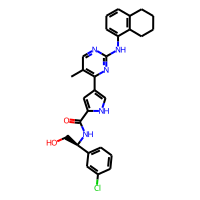
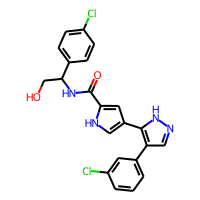
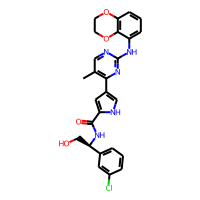
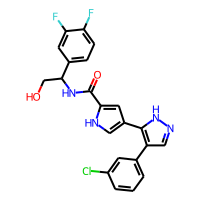
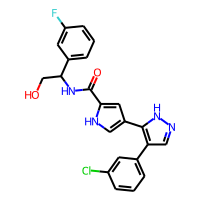
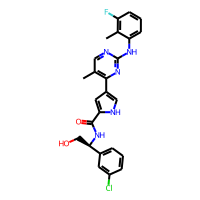
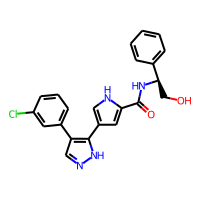
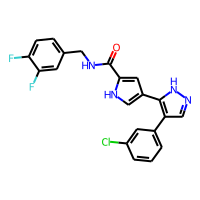
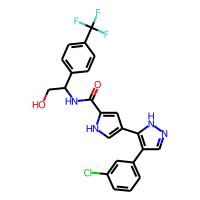
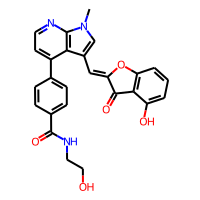
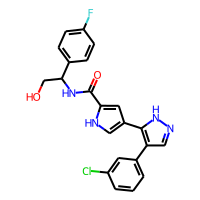
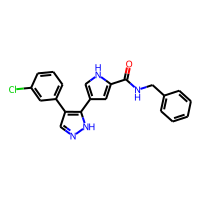
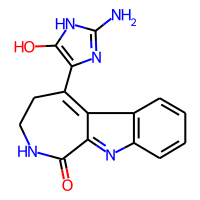
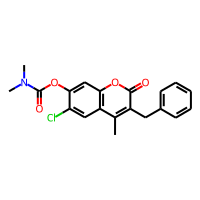
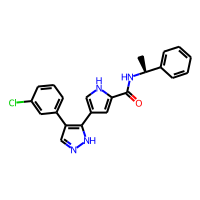
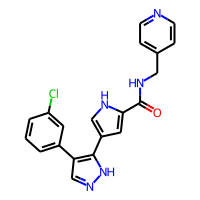
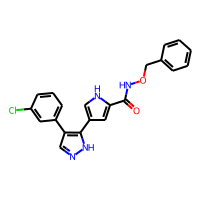
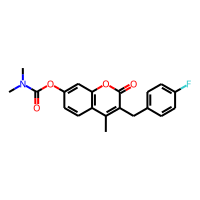
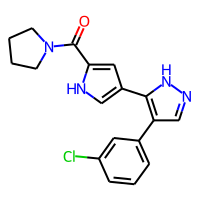
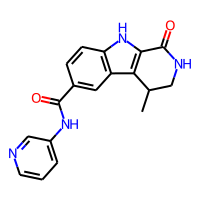
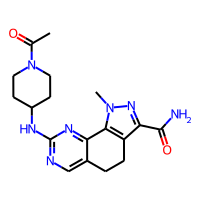
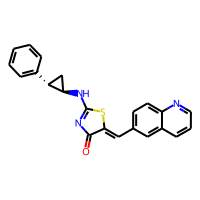
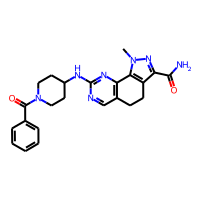
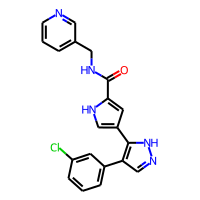

In [120]:
sdf_df

In [39]:
from rdkit.Chem import Descriptors

In [40]:
?Descriptors

In [41]:
help(Descriptors.MolWt)

Help on function <lambda> in module rdkit.Chem.Descriptors:

<lambda> lambda *x, **y
    The average molecular weight of the molecule
    
    >>> MolWt(Chem.MolFromSmiles('CC'))
    30.07
    >>> MolWt(Chem.MolFromSmiles('[NH4+].[Cl-]'))
    53.49...



In [109]:
smiles = "c1ccccc1"

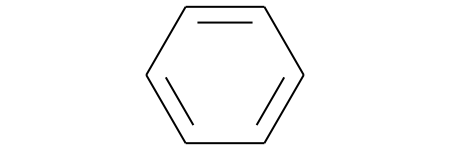

In [110]:
Chem.MolFromSmiles(smiles)

In [111]:
from rdkit.Chem import Descriptors

In [112]:
Descriptors.MolWt(Chem.MolFromSmiles(smiles))

78.11399999999999

In [113]:
round(Descriptors.MolWt(Chem.MolFromSmiles(smiles)), 3)

78.114

In [121]:
from rdkit.Chem import Crippen

In [38]:
help(Crippen)

Help on module rdkit.Chem.Crippen in rdkit.Chem:

NAME
    rdkit.Chem.Crippen - Atom-based calculation of LogP and MR using Crippen's approach

DESCRIPTION
    
    Reference:
      S. A. Wildman and G. M. Crippen *JCICS* _39_ 868-873 (1999)

FUNCTIONS
    MolLogP lambda *x, **y
        Wildman-Crippen LogP value
        
        Uses an atom-based scheme based on the values in the paper:
           S. A. Wildman and G. M. Crippen JCICS 39 868-873 (1999)
        
        **Arguments**
        
          - inMol: a molecule
        
          - addHs: (optional) toggles adding of Hs to the molecule for the calculation.
            If true, hydrogens will be added to the molecule and used in the calculation.
    
    MolMR lambda *x, **y
        Wildman-Crippen MR value
        
        Uses an atom-based scheme based on the values in the paper:
           S. A. Wildman and G. M. Crippen JCICS 39 868-873 (1999)
        
        **Arguments**
        
          - inMol: a molecule
       

In [42]:
help(Crippen.MolLogP)

Help on function <lambda> in module rdkit.Chem.Crippen:

<lambda> lambda *x, **y
    Wildman-Crippen LogP value
    
    Uses an atom-based scheme based on the values in the paper:
       S. A. Wildman and G. M. Crippen JCICS 39 868-873 (1999)
    
    **Arguments**
    
      - inMol: a molecule
    
      - addHs: (optional) toggles adding of Hs to the molecule for the calculation.
        If true, hydrogens will be added to the molecule and used in the calculation.



LogP - липофильность

In [69]:
Crippen.MolLogP(Chem.MolFromSmiles(smiles))

1.6866

In [43]:
help(Crippen.MolMR)

Help on function <lambda> in module rdkit.Chem.Crippen:

<lambda> lambda *x, **y
    Wildman-Crippen MR value
    
    Uses an atom-based scheme based on the values in the paper:
       S. A. Wildman and G. M. Crippen JCICS 39 868-873 (1999)
    
    **Arguments**
    
      - inMol: a molecule
    
      - addHs: (optional) toggles adding of Hs to the molecule for the calculation.
        If true, hydrogens will be added to the molecule and used in the calculation.



In [124]:
sdf_df["MW"] = [Descriptors.MolWt(x) for x in sdf_df.ROMol]
# Добавляет столбец с молекулярным весом для каждой молекулы через генератор списков.

In [125]:
sdf_df["LogP"] = [Crippen.MolLogP(i) for i in sdf_df.ROMol]

ID                                              ROMol  \
0    168691 CHEMBL318804  <img data-content="rdkit/molecule" src="data:i...   
1        86358 CHEMBL162  <img data-content="rdkit/molecule" src="data:i...   
2    575087 CHEMBL576683  <img data-content="rdkit/molecule" src="data:i...   
3    575065 CHEMBL571484  <img data-content="rdkit/molecule" src="data:i...   
4    575047 CHEMBL568937  <img data-content="rdkit/molecule" src="data:i...   
5    575012 CHEMBL571056  <img data-content="rdkit/molecule" src="data:i...   
6    574947 CHEMBL583042  <img data-content="rdkit/molecule" src="data:i...   
7    574890 CHEMBL572157  <img data-content="rdkit/molecule" src="data:i...   
8    574823 CHEMBL571031  <img data-content="rdkit/molecule" src="data:i...   
9    574810 CHEMBL565460  <img data-content="rdkit/molecule" src="data:i...   
10   574805 CHEMBL577193  <img data-content="rdkit/molecule" src="data:i...   
11   574889 CHEMBL569869  <img data-content="rdkit/molecule" src="data:i...   
12   574780 CHEMBL572162  <img data-content="rdkit/molecule" src="data:i...   
13   574880 CHEMBL584754  <img data-content="rdkit/molecule" src="data:i...   
14   574838 CHEMBL571038  <img data-content="rdkit/molecule" src="data:i...   
15   574809 CHEMBL565459  <img data-content="rdkit/molecule" src="data:i...   
16   574964 CHEMBL569181  <img data-content="rdkit/molecule" src="data:i...   
17   574881 CHEMBL572361  <img data-content="rdkit/molecule" src="data:i...   
18   574870 CHEMBL570366  <img data-content="rdkit/molecule" src="data:i...   
19   574822 CHEMBL571030  <img data-content="rdkit/molecule" src="data:i...   
20   574963 CHEMBL576048  <img data-content="rdkit/molecule" src="data:i...   
21   574936 CHEMBL568483  <img data-content="rdkit/molecule" src="data:i...   
22   250364 CHEMBL359106  <img data-content="rdkit/molecule" src="data:i...   
23   307979 CHEMBL361708  <img data-content="rdkit/molecule" src="data:i...   
24   370070 CHEMBL220054  <img data-content="rdkit/molecule" src="data:i...   
25   370069 CHEMBL220897  <img data-content="rdkit/molecule" src="data:i...   
26   575055 CHEMBL570111  <img data-content="rdkit/molecule" src="data:i...   
27   370040 CHEMBL375544  <img data-content="rdkit/molecule" src="data:i...   
28   574915 CHEMBL571722  <img data-content="rdkit/molecule" src="data:i...   
29   370065 CHEMBL219790  <img data-content="rdkit/molecule" src="data:i...   
30   370057 CHEMBL219849  <img data-content="rdkit/molecule" src="data:i...   
31   574905 CHEMBL582829  <img data-content="rdkit/molecule" src="data:i...   
32   370099 CHEMBL220112  <img data-content="rdkit/molecule" src="data:i...   
33   370039 CHEMBL222249  <img data-content="rdkit/molecule" src="data:i...   
34   370046 CHEMBL222465  <img data-content="rdkit/molecule" src="data:i...   
35  620576 CHEMBL1092754  <img data-content="rdkit/molecule" src="data:i...   
36   370035 CHEMBL374677  <img data-content="rdkit/molecule" src="data:i...   
37   370129 CHEMBL220320  <img data-content="rdkit/molecule" src="data:i...   
38   201833 CHEMBL332551  <img data-content="rdkit/molecule" src="data:i...   
39    126856 CHEMBL80837  <img data-content="rdkit/molecule" src="data:i...   
40   370068 CHEMBL373628  <img data-content="rdkit/molecule" src="data:i...   
41   370032 CHEMBL221109  <img data-content="rdkit/molecule" src="data:i...   
42   370062 CHEMBL220272  <img data-content="rdkit/molecule" src="data:i...   
43    127465 CHEMBL78779  <img data-content="rdkit/molecule" src="data:i...   
44   370082 CHEMBL220110  <img data-content="rdkit/molecule" src="data:i...   
45   412025 CHEMBL437943  <img data-content="rdkit/molecule" src="data:i...   
46   603516 CHEMBL599224  <img data-content="rdkit/molecule" src="data:i...   
47   395709 CHEMBL235345  <img data-content="rdkit/molecule" src="data:i...   
48   603518 CHEMBL599428  <img data-content="rdkit/molecule" src="data:i...   
49   370024 CHEMBL220343  <img data-content="rdkit/molecule" src="data:i
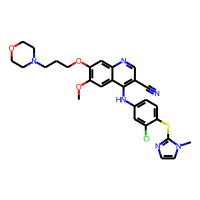
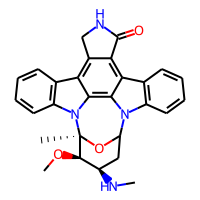
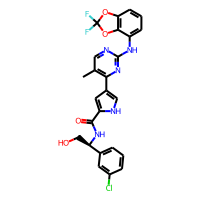
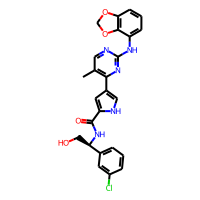
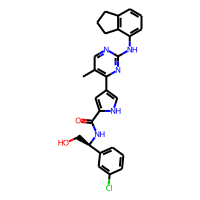
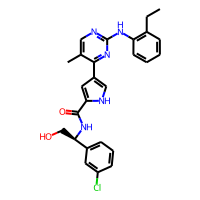
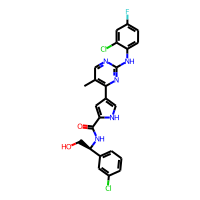
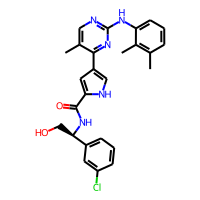
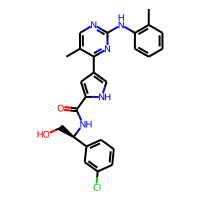
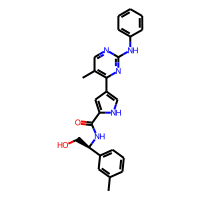
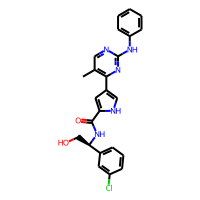
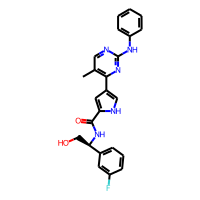
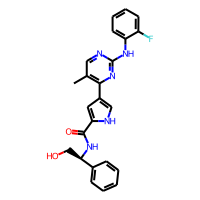
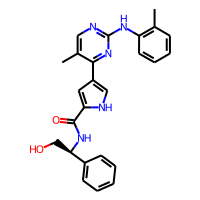
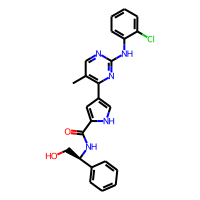
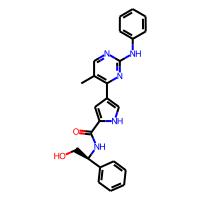
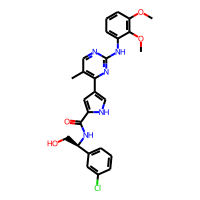
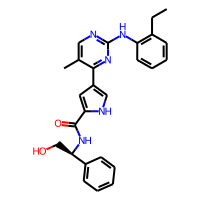
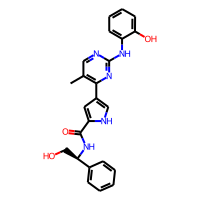
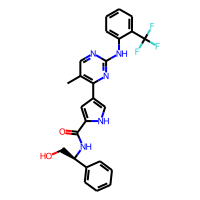
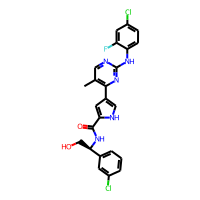
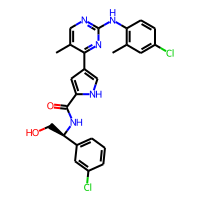
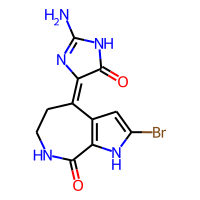
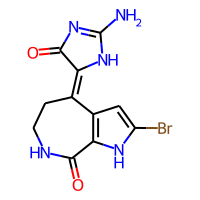
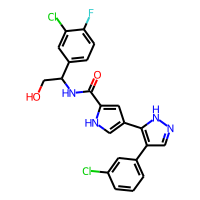
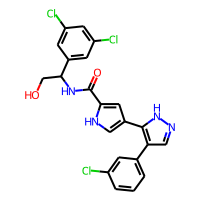
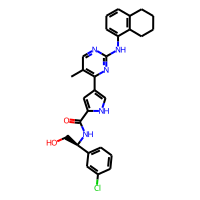
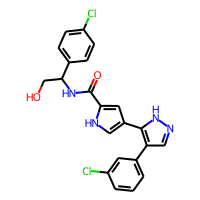
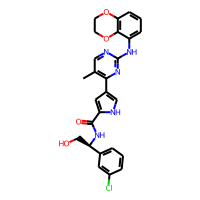
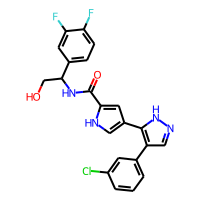
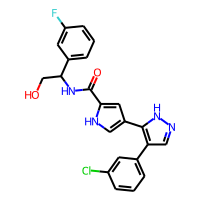
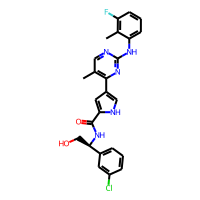
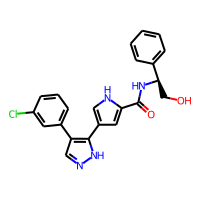
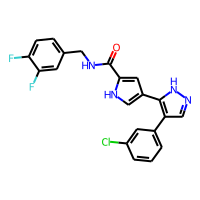
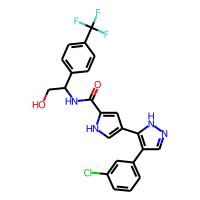
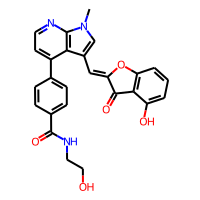
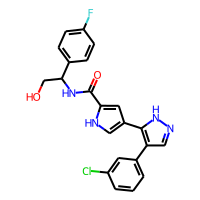
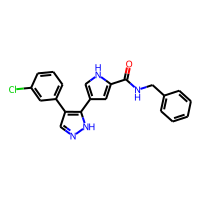
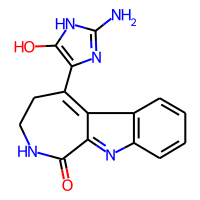
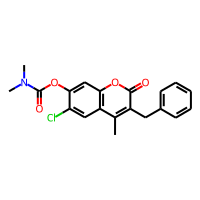
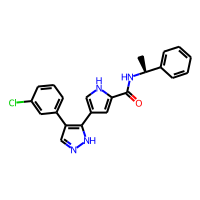
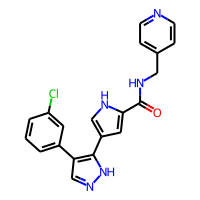
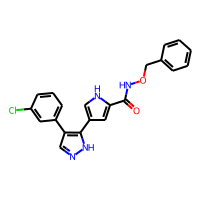
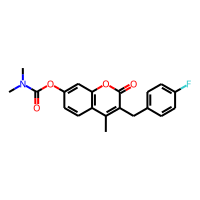
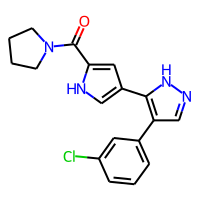
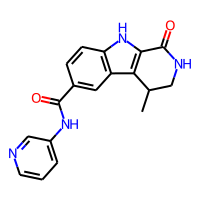
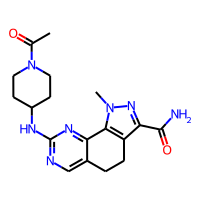
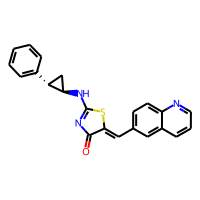
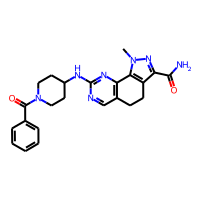
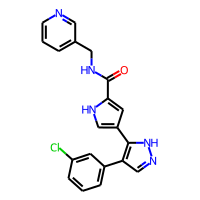

In [126]:
sdf_df

In [127]:
sdf_df["Number of Aromatic Rings"] = [Descriptors.NumAromaticRings(i) for i in sdf_df.ROMol]

ID                                              ROMol  \
0    168691 CHEMBL318804  <img data-content="rdkit/molecule" src="data:i...   
1        86358 CHEMBL162  <img data-content="rdkit/molecule" src="data:i...   
2    575087 CHEMBL576683  <img data-content="rdkit/molecule" src="data:i...   
3    575065 CHEMBL571484  <img data-content="rdkit/molecule" src="data:i...   
4    575047 CHEMBL568937  <img data-content="rdkit/molecule" src="data:i...   
5    575012 CHEMBL571056  <img data-content="rdkit/molecule" src="data:i...   
6    574947 CHEMBL583042  <img data-content="rdkit/molecule" src="data:i...   
7    574890 CHEMBL572157  <img data-content="rdkit/molecule" src="data:i...   
8    574823 CHEMBL571031  <img data-content="rdkit/molecule" src="data:i...   
9    574810 CHEMBL565460  <img data-content="rdkit/molecule" src="data:i...   
10   574805 CHEMBL577193  <img data-content="rdkit/molecule" src="data:i...   
11   574889 CHEMBL569869  <img data-content="rdkit/molecule" src="data:i...   
12   574780 CHEMBL572162  <img data-content="rdkit/molecule" src="data:i...   
13   574880 CHEMBL584754  <img data-content="rdkit/molecule" src="data:i...   
14   574838 CHEMBL571038  <img data-content="rdkit/molecule" src="data:i...   
15   574809 CHEMBL565459  <img data-content="rdkit/molecule" src="data:i...   
16   574964 CHEMBL569181  <img data-content="rdkit/molecule" src="data:i...   
17   574881 CHEMBL572361  <img data-content="rdkit/molecule" src="data:i...   
18   574870 CHEMBL570366  <img data-content="rdkit/molecule" src="data:i...   
19   574822 CHEMBL571030  <img data-content="rdkit/molecule" src="data:i...   
20   574963 CHEMBL576048  <img data-content="rdkit/molecule" src="data:i...   
21   574936 CHEMBL568483  <img data-content="rdkit/molecule" src="data:i...   
22   250364 CHEMBL359106  <img data-content="rdkit/molecule" src="data:i...   
23   307979 CHEMBL361708  <img data-content="rdkit/molecule" src="data:i...   
24   370070 CHEMBL220054  <img data-content="rdkit/molecule" src="data:i...   
25   370069 CHEMBL220897  <img data-content="rdkit/molecule" src="data:i...   
26   575055 CHEMBL570111  <img data-content="rdkit/molecule" src="data:i...   
27   370040 CHEMBL375544  <img data-content="rdkit/molecule" src="data:i...   
28   574915 CHEMBL571722  <img data-content="rdkit/molecule" src="data:i...   
29   370065 CHEMBL219790  <img data-content="rdkit/molecule" src="data:i...   
30   370057 CHEMBL219849  <img data-content="rdkit/molecule" src="data:i...   
31   574905 CHEMBL582829  <img data-content="rdkit/molecule" src="data:i...   
32   370099 CHEMBL220112  <img data-content="rdkit/molecule" src="data:i...   
33   370039 CHEMBL222249  <img data-content="rdkit/molecule" src="data:i...   
34   370046 CHEMBL222465  <img data-content="rdkit/molecule" src="data:i...   
35  620576 CHEMBL1092754  <img data-content="rdkit/molecule" src="data:i...   
36   370035 CHEMBL374677  <img data-content="rdkit/molecule" src="data:i...   
37   370129 CHEMBL220320  <img data-content="rdkit/molecule" src="data:i...   
38   201833 CHEMBL332551  <img data-content="rdkit/molecule" src="data:i...   
39    126856 CHEMBL80837  <img data-content="rdkit/molecule" src="data:i...   
40   370068 CHEMBL373628  <img data-content="rdkit/molecule" src="data:i...   
41   370032 CHEMBL221109  <img data-content="rdkit/molecule" src="data:i...   
42   370062 CHEMBL220272  <img data-content="rdkit/molecule" src="data:i...   
43    127465 CHEMBL78779  <img data-content="rdkit/molecule" src="data:i...   
44   370082 CHEMBL220110  <img data-content="rdkit/molecule" src="data:i...   
45   412025 CHEMBL437943  <img data-content="rdkit/molecule" src="data:i...   
46   603516 CHEMBL599224  <img data-content="rdkit/molecule" src="data:i...   
47   395709 CHEMBL235345  <img data-content="rdkit/molecule" src="data:i...   
48   603518 CHEMBL599428  <img data-content="rdkit/molecule" src="data:i...   
49   370024 CHEMBL220343  <img data-content="rdkit/molecule" src="data:i
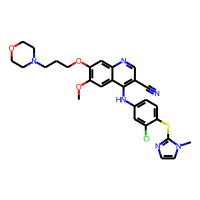
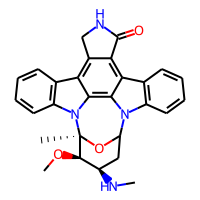
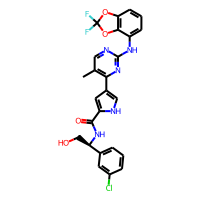
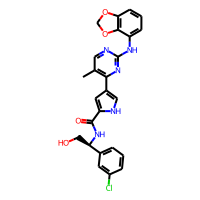
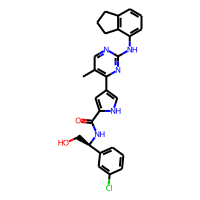
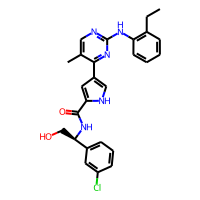
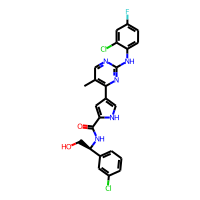
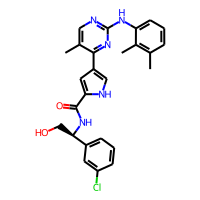
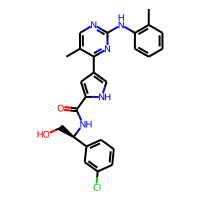
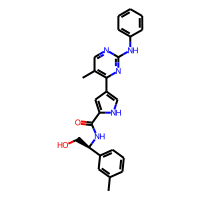
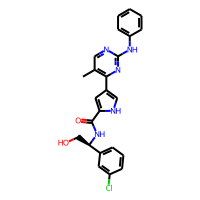
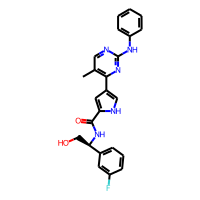
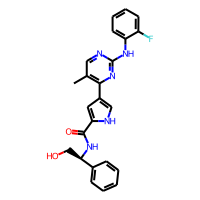
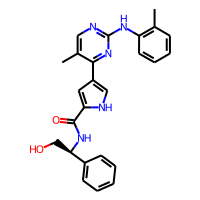
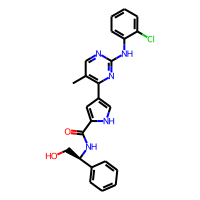
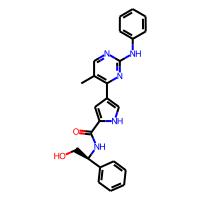
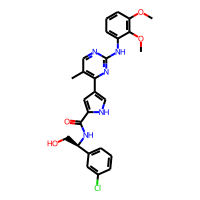
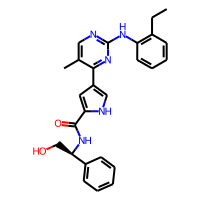
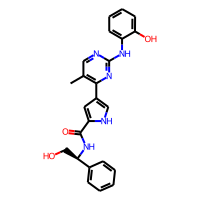
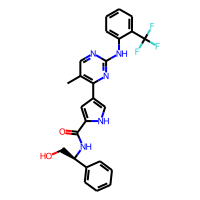
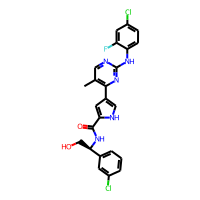
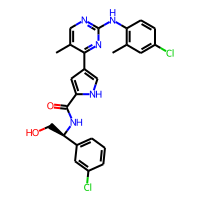
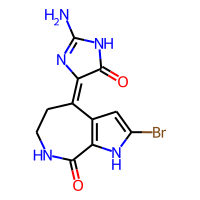
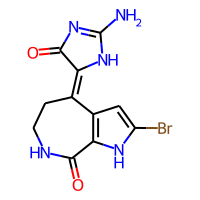
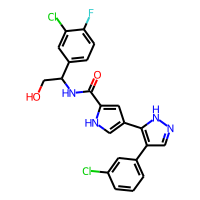
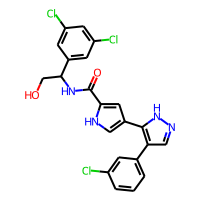
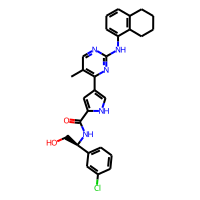
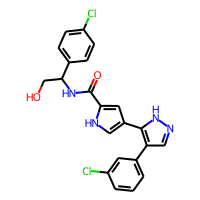
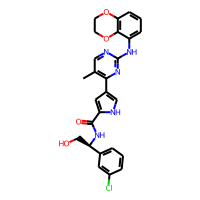
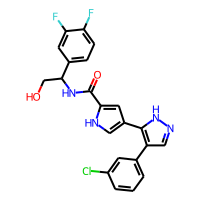
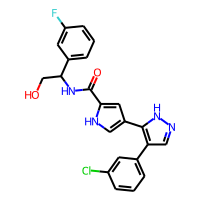
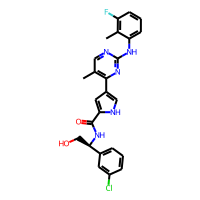
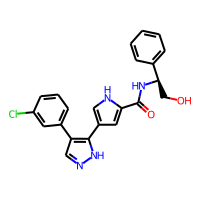
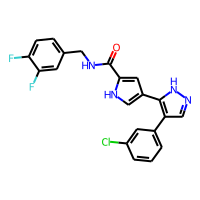
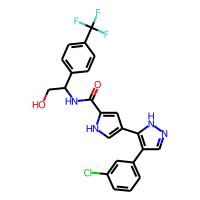
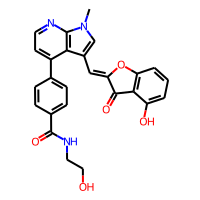
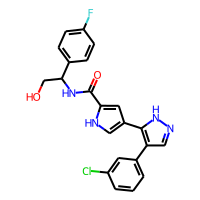
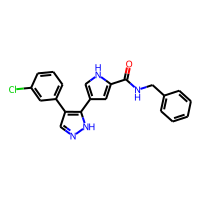
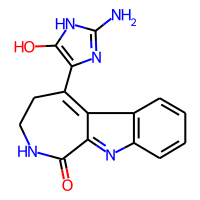
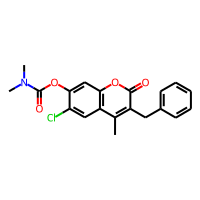
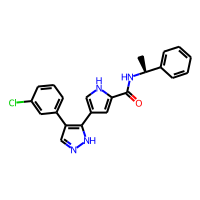
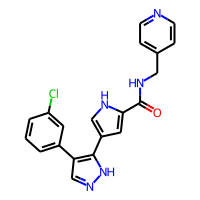
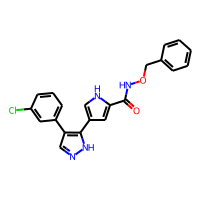
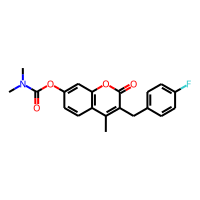
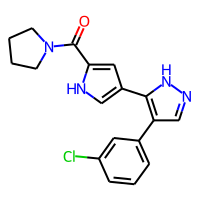
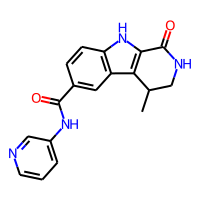
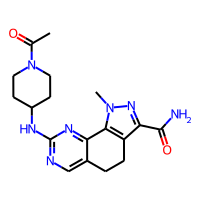
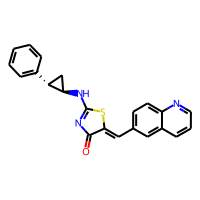
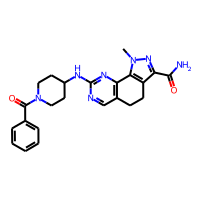
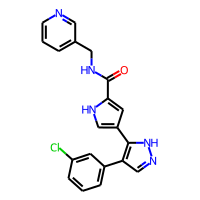

In [128]:
sdf_df

Допустим я хочу подсветить все ароматические кольца в датасете:
* Для этого мне нужно указать паттерн который будет сверен.

In [129]:
pattern = Chem.MolFromSmiles("c1ccccc1")

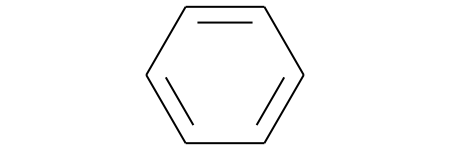

In [130]:
pattern

**GetSubstractMatch** - Возвращает список совпадающих атомов (0, 5, 1)

**HasSunstractMatch** - Используется для поика определенных структр. Возвращает True False

In [131]:
aromo_hits = [i.GetSubstructMatch(pattern) for i in sdf_df.ROMol]

In [134]:
#aromo_hits

### Для того чтобы подсветить определенный **списко** атомов используется комманда **highlightAtomLists**

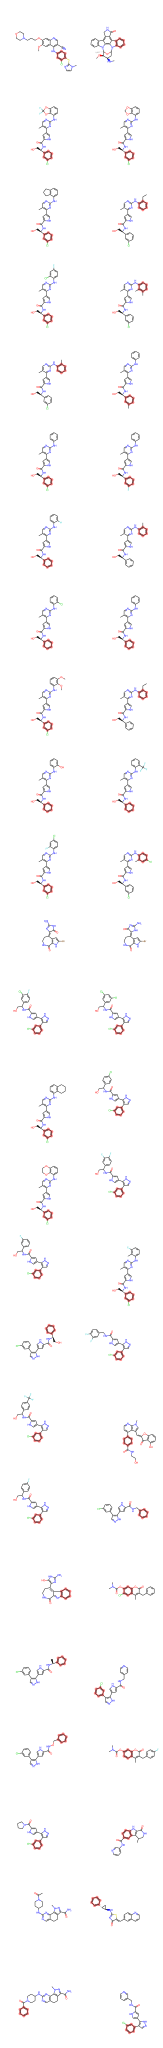

In [148]:
Draw.MolsToGridImage(sdf_df.ROMol, molsPerRow=2, subImgSize=(400,400), useSVG=True,
                     highlightAtomLists = aromo_hits)

# Working with tabs

In [10]:
sol_df = pd.read_csv(r"/home/aster/Загрузки/Telegram Desktop/curated-solubility-dataset.csv")

In [11]:
sol_df.head()

ID                                               Name  \
0  A-3         N,N,N-trimethyloctadecan-1-aminium bromide   
1  A-4                           Benzo[cd]indol-2(1H)-one   
2  A-5                               4-chlorobenzaldehyde   
3  A-8  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4  A-9  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   

                                               InChI  \
0  InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1  InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2        InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3  InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4  InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   

                      InChIKey  \
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2  AVPYQKSLYISFPO-UHFFFAOYSA-N   
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4  FAUAZXVRLVIARB-UHFFFAOYSA-N   

                                              SMILES  Solubility   SD  \
0                [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -3.616127  0.0   
1                               O=C1Nc2cccc3cccc1c23   -3.254767  0.0   
2                                    Clc1ccc(C=O)cc1   -2.177078  0.0   
3  [Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...   -3.924409  0.0   
4  C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -4.662065  0.0   

   Ocurrences Group    MolWt  ...  NumRotatableBonds  NumValenceElectrons  \
0           1    G1  392.510  ...               17.0                142.0   
1           1    G1  169.183  ...                0.0                 62.0   
2           1    G1  140.569  ...                1.0                 46.0   
3           1    G1  756.226  ...               10.0                264.0   
4           1    G1  422.525  ...               12.0                164.0   

   NumAromaticRings  NumSaturatedRings  NumAliphaticRings  RingCount    TPSA  \
0               0.0                0.0                0.0        0.0    0.00   
1               2.0                0.0                1.0        3.0   29.10   
2               1.0                0.0                0.0        1.0   17.07   
3               6.0                0.0                0.0        6.0  120.72   
4               2.0                4.0                4.0        6.0   56.60   

    LabuteASA      BalabanJ      BertzCT  
0  158.520601  0.000000e+00   210.377334  
1   75.183563  2.582996e+00   511.229248  
2   58.261134  3.009782e+00   202.661065  
3  323.755434  2.322963e-07  1964.648666  
4  183.183268  1.084427e+00   769.899934  

[5 rows x 26 columns]

In [65]:
sol_df.count()

ID                     9982
Name                   9982
InChI                  9982
InChIKey               9982
SMILES                 9982
Solubility             9982
SD                     9982
Ocurrences             9982
Group                  9982
MolWt                  9982
MolLogP                9982
MolMR                  9982
HeavyAtomCount         9982
NumHAcceptors          9982
NumHDonors             9982
NumHeteroatoms         9982
NumRotatableBonds      9982
NumValenceElectrons    9982
NumAromaticRings       9982
NumSaturatedRings      9982
NumAliphaticRings      9982
RingCount              9982
TPSA                   9982
LabuteASA              9982
BalabanJ               9982
BertzCT                9982
dtype: int64

In [67]:
sol_df.dtypes

ID                      object
Name                    object
InChI                   object
InChIKey                object
SMILES                  object
Solubility             float64
SD                     float64
Ocurrences               int64
Group                   object
MolWt                  float64
MolLogP                float64
MolMR                  float64
HeavyAtomCount         float64
NumHAcceptors          float64
NumHDonors             float64
NumHeteroatoms         float64
NumRotatableBonds      float64
NumValenceElectrons    float64
NumAromaticRings       float64
NumSaturatedRings      float64
NumAliphaticRings      float64
RingCount              float64
TPSA                   float64
LabuteASA              float64
BalabanJ               float64
BertzCT                float64
dtype: object

In [69]:
help(sol_df.describe)

Help on method describe in module pandas.core.generic:

describe(percentiles=None, include=None, exclude=None, datetime_is_numeric=False) -> ~FrameOrSeries method of pandas.core.frame.DataFrame instance
    Generate descriptive statistics.
    
    Descriptive statistics include those that summarize the central
    tendency, dispersion and shape of a
    dataset's distribution, excluding ``NaN`` values.
    
    Analyzes both numeric and object series, as well
    as ``DataFrame`` column sets of mixed data types. The output
    will vary depending on what is provided. Refer to the notes
    below for more detail.
    
    Parameters
    ----------
    percentiles : list-like of numbers, optional
        The percentiles to include in the output. All should
        fall between 0 and 1. The default is
        ``[.25, .5, .75]``, which returns the 25th, 50th, and
        75th percentiles.
    include : 'all', list-like of dtypes or None (default), optional
        A white list of data typ

In [149]:
sol_df.describe()

Solubility           SD   Ocurrences        MolWt      MolLogP  \
count  9982.000000  9982.000000  9982.000000  9982.000000  9982.000000   
mean     -2.889909     0.067449     1.378081   266.665946     1.979167   
std       2.368154     0.234702     1.023476   184.179024     3.517738   
min     -13.171900     0.000000     1.000000     9.012000   -40.873200   
25%      -4.326325     0.000000     1.000000   162.276000     0.619750   
50%      -2.618173     0.000000     1.000000   228.682000     1.949220   
75%      -1.209735     0.000000     1.000000   320.436000     3.419030   
max       2.137682     3.870145    38.000000  5299.456000    68.541140   

             MolMR  HeavyAtomCount  NumHAcceptors   NumHDonors  \
count  9982.000000     9982.000000    9982.000000  9982.000000   
mean     66.794594       17.374674       3.486776     1.108595   
std      46.523021       12.241536       3.498203     1.488973   
min       0.000000        1.000000       0.000000     0.000000   
25%      40.602475       11.000000       2.000000     0.000000   
50%      58.633400       15.000000       3.000000     1.000000   
75%      81.938000       21.000000       4.000000     2.000000   
max    1419.351700      388.000000      86.000000    26.000000   

       NumHeteroatoms  NumRotatableBonds  NumValenceElectrons  \
count     9982.000000        9982.000000          9982.000000   
mean         5.196955           4.073031            94.243438   
std          4.736275           5.646925            64.748563   
min          0.000000           0.000000             0.000000   
25%          3.000000           1.000000            58.000000   
50%          4.000000           3.000000            82.000000   
75%          6.000000           5.000000           112.000000   
max         89.000000         141.000000          2012.000000   

       NumAromaticRings  NumSaturatedRings  NumAliphaticRings    RingCount  \
count       9982.000000        9982.000000        9982.000000  9982.000000   
mean           1.068323           0.292627           0.447606     1.515929   
std            1.309427           0.879599           1.054667     1.644334   
min            0.000000           0.000000           0.000000     0.000000   
25%            0.000000           0.000000           0.000000     0.000000   
50%            1.000000           0.000000           0.000000     1.000000   
75%            2.000000           0.000000           1.000000     2.000000   
max           35.000000          30.000000          30.000000    36.000000   

              TPSA    LabuteASA     BalabanJ       BertzCT  
count  9982.000000  9982.000000  9982.000000   9982.000000  
mean     62.458601   108.912586     2.392199    467.336782  
std      63.348307    76.462726     1.091123    546.631696  
min       0.000000     7.504228    -0.000004      0.000000  
25%      26.300000    66.623721     2.004357    163.243343  
50%      50.720000    93.299873     2.539539    351.640433  
75%      80.390000   129.118374     3.032456    606.562848  
max    1214.340000  2230.685124     7.517310  20720.267708

value_count() - позводяет быстро посчитать сколько раз встречаетс какое либо значение

In [71]:
sol_df.Solubility.value_counts()

-2.680000    16
-2.700000    15
-2.300000    14
-3.820000    13
-3.550000    13
             ..
-1.261500     1
-5.263225     1
-5.296600     1
-0.821231     1
-1.458900     1
Name: Solubility, Length: 7872, dtype: int64

Выбирать колонки по какомк либо значению можно следующим образом:

In [75]:
sol_df.Solubility == -3.82 # Условие

0       False
1       False
2       False
3       False
4       False
        ...  
9977    False
9978    False
9979    False
9980    False
9981    False
Name: Solubility, Length: 9982, dtype: bool

In [153]:
sol_df[sol_df.Solubility <= -12] # Показывает только соединиения с растворимостью -3.82

ID                                        Name  \
5528  B-2402                             dechlorane plus   
7058  B-4424  1,2,3,4,6,7,8,9-octachlorodibenzo-p-dioxin   
9875    H-94                  Decachlorodiphenyl ether     

                                                  InChI  \
5528  InChI=1S/C18H12Cl12/c19-9-10(20)15(25)7-3-4-8-...   
7058  InChI=1S/C12Cl8O2/c13-1-2(14)6(18)10-9(5(1)17)...   
9875  InChI=1S/C12Cl10O/c13-1-3(15)7(19)11(8(20)4(1)...   

                         InChIKey  \
5528  UGQQAJOWXNCOPY-UHFFFAOYSA-N   
7058  FOIBFBMSLDGNHL-UHFFFAOYSA-N   
9875  CIPFDHFTBYJKQB-UHFFFAOYSA-N   

                                                 SMILES  Solubility       SD  \
5528  ClC1=C(Cl)C2(Cl)C3CCC4C(CCC3C1(Cl)C2(Cl)Cl)C5(...    -13.1719  0.00000   
7058   Clc1c(Cl)c(Cl)c2Oc3c(Cl)c(Cl)c(Cl)c(Cl)c3Oc2c1Cl    -12.0605  0.36475   
9875  ClC1=C(Cl)C(Cl)=C(OC2=C(Cl)C(Cl)=C(Cl)C(Cl)=C2...    -12.9500  0.00000   

      Ocurrences Group    MolWt  ...  NumRotatableBonds  NumValenceElectrons  \
5528           1    G1  653.730  ...                0.0                168.0   
7058           2    G3  459.754  ...                0.0                116.0   
9875           1    G1  514.661  ...                2.0                124.0   

      NumAromaticRings  NumSaturatedRings  NumAliphaticRings  RingCount  \
5528               0.0                3.0                5.0        5.0   
7058               2.0                0.0                1.0        3.0   
9875               2.0                0.0                0.0        2.0   

       TPSA   LabuteASA  BalabanJ     BertzCT  
5528   0.00  234.174100  1.619292  782.127616  
7058  18.46  164.135886  2.320888  697.841798  
9875   9.23  180.634705  2.712767  690.954533  

[3 rows x 26 columns]

In [154]:
mols_with_low_sol = [Chem.MolFromSmiles(i) for i in sol_df.SMILES[sol_df.Solubility < -12]]

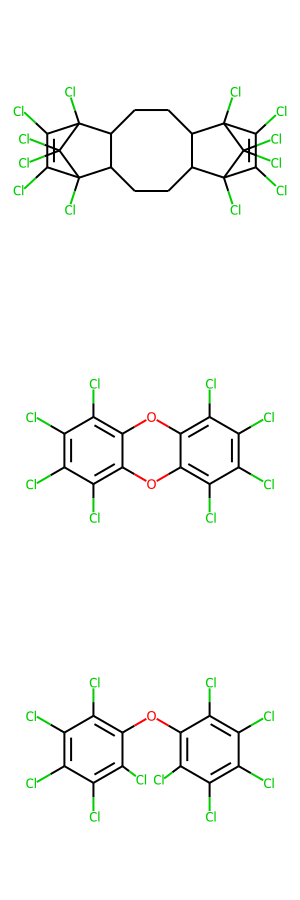

In [155]:
Draw.MolsToGridImage(mols_with_low_sol, molsPerRow=1, subImgSize=(300,300))

In [142]:
imgs = Draw.MolsToGridImage(mols_with_low_sol, molsPerRow=1, subImgSize=(300,300), useSVG=True)

In [158]:
mol_sol = pd.DataFrame({"ID": sol_df.ID[sol_df.Solubility < -12],
                       "Solubility": sol_df.Solubility[sol_df.Solubility < -12],
                       "Name": sol_df.Name[sol_df.Solubility < -12],
                        "MolWeith": sol_df.MolWt[sol_df.Solubility < -12],
                       "img": mols_with_low_sol})

ID  Solubility                                        Name  \
5528  B-2402    -13.1719                             dechlorane plus   
7058  B-4424    -12.0605  1,2,3,4,6,7,8,9-octachlorodibenzo-p-dioxin   
9875    H-94    -12.9500                  Decachlorodiphenyl ether     

      MolWeith                                                img  
5528   653.730  <img data-content="rdkit/molecule" src="data:i...  
7058   459.754  <img data-content="rdkit/molecule" src="data:i...  
9875   514.661  <img data-content="rdkit/molecule" src="data:i...
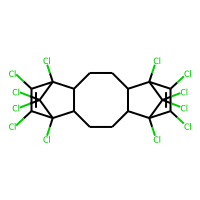
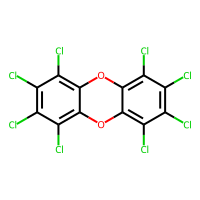
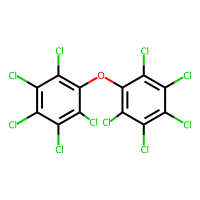

In [159]:
mol_sol

Для фильтрации выводимых результатов дата фрейма можно использовать несколько условий

In [12]:
sol_df[(sol_df.Solubility == -3.82) & (sol_df.Group.isin(["G1", "G2"]))]

ID                                               Name  \
7330   C-433                       11-alpha-hydroxyprogesterone   
7830  C-1583                                        cantharidin   
8327  C-2347                              naproxen,  derivat 3b   
8329  C-2349                              naproxen,  derivat 3c   
8374  C-2428  4-(4-bromo-2-fluorophenylamino)-n-ethoxy-1,5-d...   
8461  C-2541                                  fluorescein (red)   
8690    E-17                                    trans-2-heptene   
9302   F-635                            2-butoxy-5-nitroaniline   
9887   H-268                         11-a-Hydroxyprogesterone     

                                                  InChI  \
7330  InChI=1S/C21H30O3/c1-12(22)16-6-7-17-15-5-4-13...   
7830  InChI=1S/C10H12O4/c1-9-5-3-4-6(13-5)10(9,2)8(1...   
8327  InChI=1S/C22H29NO5/c1-14(2)11-20(23)22(25)28-1...   
8329  InChI=1S/C22H29NO5/c1-5-14(2)20(23)22(25)28-11...   
8374  InChI=1S/C16H17BrFN3O3/c1-4-24-20-15(22)11-8-2...   
8461  InChI=1S/C20H12O5/c21-11-5-7-15-17(9-11)25-18-...   
8690  InChI=1S/C7H14/c1-3-5-7-6-4-2/h3,5H,4,6-7H2,1-2H3   
9302  InChI=1S/C10H14N2O3/c1-2-3-6-15-10-5-4-8(12(13...   
9887  InChI=1S/C21H30O3/c1-12(22)16-6-7-17-15-5-4-13...   

                         InChIKey  \
7330  BFZHCUBIASXHPK-UHFFFAOYSA-N   
7830  DHZBEENLJMYSHQ-UHFFFAOYSA-N   
8327  GVNYQGKVULMAET-UHFFFAOYSA-N   
8329  ZNNNHDSEKOSIMH-UHFFFAOYSA-N   
8374  IKVITEMYFVVJFY-UHFFFAOYSA-N   
8461  YKGGGCXBWXHKIZ-UHFFFAOYSA-N   
8690  OTTZHAVKAVGASB-UHFFFAOYSA-N   
9302  ZQTPOMUMEJTURV-UHFFFAOYSA-N   
9887  AARNXMRADQFOEB-UHFFFAOYSA-N   

                                                 SMILES  Solubility   SD  \
7330        CC(=O)C1CCC2C3CCC4=CC(=O)CCC4(C)C3C(O)CC12C       -3.82  0.0   
7830                       CC12C3CCC(O3)C1(C)C(=O)OC2=O       -3.82  0.0   
8327  COC1=CC=C2C=C(C=CC2=C1)C(C)C(=O)OCCOC(=O)C(N)C...       -3.82  0.0   
8329  CCC(C)C(N)C(=O)OCCOC(=O)C(C)C1=CC2=CC=C(OC)C=C...       -3.82  0.0   
8374   CCONC(=O)C1=CN(C)C(=O)C(=C1NC2=C(F)C=C(Br)C=C2)C       -3.82  0.0   
8461  OC(=O)C1=CC=CC=C1C2=C3C=CC(=O)C=C3OC4=C2C=CC(=...       -3.82  0.0   
8690                                           CCCCC=CC       -3.82  0.0   
9302                  CCCCOC1=C(C=C(C=C1)[N+](=O)[O-])N       -3.82  0.0   
9887        CC(=O)C1CCC2C3CCC4=CC(=O)CC(O)C4(C)C3CCC12C       -3.82  0.0   

      Ocurrences Group    MolWt  ...  NumRotatableBonds  NumValenceElectrons  \
7330           1    G1  330.468  ...                1.0                132.0   
7830           1    G1  196.202  ...                0.0                 76.0   
8327           1    G1  387.476  ...                9.0                152.0   
8329           1    G1  387.476  ...                9.0                152.0   
8374           1    G1  398.232  ...                5.0                128.0   
8461           1    G1  332.311  ...                2.0                122.0   
8690           1    G1   98.189  ...                3.0                 42.0   
9302           1    G1  210.233  ...                5.0                 82.0   
9887           1    G1  330.468  ...                1.0                132.0   

      NumAromaticRings  NumSaturatedRings  NumAliphaticRings  RingCount  \
7330               0.0                3.0                4.0        4.0   
7830               0.0                3.0                3.0        3.0   
8327               2.0                0.0                0.0        2.0   
8329               2.0                0.0                0.0        2.0   
8374               2.0                0.0                0.0        2.0   
8461               2.0                0.0                2.0        4.0   
8690               0.0                0.0                0.0        0.0   
9302               1.0                0.0                0.0        1.0   
9887               0.0                3.0                4.0        4.0   

       TPSA   LabuteASA  BalabanJ      BertzCT  
7330  54.37  14

Для сортировки используется комманда **sort_values()**

In [138]:
sol_df.sort_values("Solubility", ascending=False)

ID                                             Name  \
1777  A-2918             4-methyl-2-(2-methylpropyl)oxan-4-ol   
1755  A-2889  bis(tetrakis(hydroxymethyl)phosphanium) sulfate   
1948  A-3211                                 ammonium bromide   
2513  A-4203                         azanium 2-hydroxyacetate   
5457  B-2321                                hydrogen fluoride   
...      ...                                              ...   
9740   G-117                     2,2',3,3',4,4',5,5',6,6'-PCB   
1362  A-2361        copper(2+) ion bis((9Z)-octadec-9-enoate)   
7058  B-4424       1,2,3,4,6,7,8,9-octachlorodibenzo-p-dioxin   
9875    H-94                       Decachlorodiphenyl ether     
5528  B-2402                                  dechlorane plus   

                                                  InChI  \
1777  InChI=1S/C10H20O2/c1-8(2)6-9-7-10(3,11)4-5-12-...   
1755  InChI=1S/2C4H12O4P.H2O4S/c2*5-1-9(2-6,3-7)4-8;...   
1948                           InChI=1S/BrH.H3N/h1H;1H3   
2513  InChI=1S/C2H4O3.H3N/c3-1-2(4)5;/h3H,1H2,(H,4,5...   
5457                                    InChI=1S/FH/h1H   
...                                                 ...   
9740  InChI=1S/C12Cl10/c13-3-1(4(14)8(18)11(21)7(3)1...   
1362  InChI=1S/2C18H34O2.Cu/c2*1-2-3-4-5-6-7-8-9-10-...   
7058  InChI=1S/C12Cl8O2/c13-1-2(14)6(18)10-9(5(1)17)...   
9875  InChI=1S/C12Cl10O/c13-1-3(15)7(19)11(8(20)4(1)...   
5528  InChI=1S/C18H12Cl12/c19-9-10(20)15(25)7-3-4-8-...   

                         InChIKey  \
1777  YVSNOTITPICPTB-UHFFFAOYSA-N   
1755  YIEDHPBKGZGLIK-UHFFFAOYSA-L   
1948  SWLVFNYSXGMGBS-UHFFFAOYSA-N   
2513  UBKBVPONTPMQQW-UHFFFAOYSA-N   
5457  KRHYYFGTRYWZRS-UHFFFAOYSA-N   
...                           ...   
9740  ONXPZLFXDMAPRO-UHFFFAOYSA-N   
1362  SVOAENZIOKPANY-CVBJKYQLSA-L   
7058  FOIBFBMSLDGNHL-UHFFFAOYSA-N   
9875  CIPFDHFTBYJKQB-UHFFFAOYSA-N   
5528  UGQQAJOWXNCOPY-UHFFFAOYSA-N   

                                                 SMILES  Solubility        SD  \
1777                               CC(C)CC1CC(C)(O)CCO1    2.137682  0.000000   
1755  OC[P+](CO)(CO)CO.OC[P+](CO)(CO)CO.[O-][S]([O-]...    1.967513  0.000000   
1948                                       [NH4+].[Br-]    1.908300  0.000000   
2513                                 [NH4+].OCC([O-])=O    1.700916  0.000000   
5457                                          [H+].[F-]    1.698800  0.000000   
...                                                 ...         ...       ...   
9740  Clc1c(Cl)c(Cl)c(c(Cl)c1Cl)c2c(Cl)c(Cl)c(Cl)c(C...  -11.600000  0.369294   
1362  [Cu++].CCCCCCCC\C=C/CCCCCCCC([O-])=O.CCCCCCCC\...  -11.998938  0.000000   
7058   Clc1c(Cl)c(Cl)c2Oc3c(Cl)c(Cl)c(Cl)c(Cl)c3Oc2c1Cl  -12.060500  0.364750   
9875  ClC1=C(Cl)C(Cl)=C(OC2=C(Cl)C(Cl)=C(Cl)C(Cl)=C2...  -12.950000  0.000000   
5528  ClC1=C(Cl)C2(Cl)C3CCC4C(CCC3C1(Cl)C2(Cl)Cl)C5(...  -13.171900  0.000000   

      Ocurrences Group    MolWt  ...  NumRotatableBonds  NumValenceElectrons  \
1777           1    G1  172.268  ...                2.0                 72.0   
1755           1    G1  406.283  ...                8.0                144.0   
1948           1    G1   97.943  ...                0.0                 16.0   
2513           1    G1   93.082  ...                1.0                 38.0   
5457           1    G1   20.006  ...                0.0                  8.0   
...          ...   ...      ...  ...                ...                  ...   
9740           3    G5  498.662  ...                1.0                118.0   
1362           1    G1  626.466  ...               30.0                245.0   
7058           2    G3  459.754  ...                0.0                116.0   
9875           1    G1  514.661  ...                2.0                124.0   
5528           1    G1  653.730  ...                0.0                168.0   

      NumAromaticRings  NumSaturatedRings  NumAliphaticRings  RingCount  \
1777               0.0                1.0                1.0      

In [8]:
mf_df = pd.read_csv(r"/home/aster/Загрузки/Telegram Desktop/mol_formula.csv")

In [1]:
from tqdm.auto import tqdm
import seaborn as sns

In [9]:
mf_df

SMILES           MF
0     [O--].[O--].[O--].[O--].[O--].[Al+3].[Al+3].[C...     Al2Ca2O5
1     [O--].[O--].[O--].[O--].[O--].[O--].[Al+3].[Al...  Al2Ca6O18S3
2     [O--].[O--].[O--].[O--].[O--].[Al+3].[Al+3].[C...     Al2Co2O5
3     [O--].[O--].[O--].[O--].[O--].[O--].[O--].[O--...  Al2Mo2O9-12
4     [O--].[O--].[O--].[O--].[O--].[Al+3].[Al+3].[Z...     Al2O5Zn2
...                                                 ...          ...
9977                                               [Ta]           Ta
9978                                               [Te]           Te
9979                                                [V]            V
9980                                                [Y]            Y
9981                                               [Zr]           Zr

[9982 rows x 2 columns]

In [4]:
?tqdm.pandas

In [5]:
tqdm.pandas()

In [44]:
query = Chem.MolFromSmiles("c1ccccn1") # Фрагмент который мы хотим найти в других молекулах

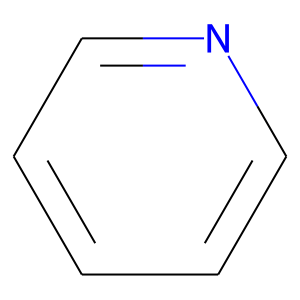

In [45]:
Draw.MolToImage(query)

In [46]:
sol_df["Mol"] = sol_df.SMILES.progress_apply(Chem.MolFromSmiles)

  0%|          | 0/9982 [00:00<?, ?it/s]

RDKit WARNING: [14:45:24] WARNING: not removing hydrogen atom without neighbors
[14:45:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:45:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:45:24] WARNING: not removing hydrogen atom without neighbors
[14:45:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:45:24] WARNING: not removing hydrogen atom without neighbors
[14:45:24] WARNING: not removing hydrogen atom without neighbors
[14:45:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:45:24] WARNING: not removing hydrogen atom without neighbors
[14:45:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:45:24] WARNING: not removing hydrogen atom without neighbors
[14:45:24] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:45:24] WARNING: not removing hydrogen atom without neighbors
[14:45:24] WARNING: not removing hydrogen atom wit

RDKit WARNING: [14:45:25] WARNING: not removing hydrogen atom without neighbors
[14:45:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:45:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:45:25] WARNING: not removing hydrogen atom without neighbors
[14:45:25] WARNING: not removing hydrogen atom without neighbors
[14:45:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:45:25] WARNING: not removing hydrogen atom without neighbors
RDKit WARNING: [14:45:25] WARNING: not removing hydrogen atom without neighbors
[14:45:25] WARNING: not removing hydrogen atom without neighbors
[14:45:25] WARNING: not removing hydrogen atom without neighbors


In [73]:
sol_df["Pyridine"] = [i.HasSubstructMatch(query) for i in tqdm(sol_df.Mol)]


  0%|          | 0/9982 [00:00<?, ?it/s]

In [48]:
double = [x.GetSubstructMatch(pyr) for x in [Chem.MolFromSmarts("c1ccccn1cc1ccccn1")]]

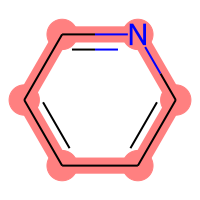

In [62]:
Draw.MolsToGridImage([Chem.MolFromSmiles("c1ccccn1")],
                molsPerRow=1, 
                highlightAtomLists=double)

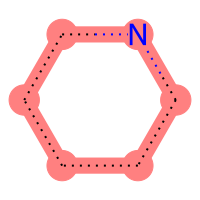

In [63]:
Draw.MolsToGridImage([Chem.MolFromSmarts("c1ccccn1")],
                molsPerRow=1, 
                highlightAtomLists=double)

In [106]:
sol_df.head()

ID                                               Name  \
0  A-3         N,N,N-trimethyloctadecan-1-aminium bromide   
1  A-4                           Benzo[cd]indol-2(1H)-one   
2  A-5                               4-chlorobenzaldehyde   
3  A-8  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4  A-9  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   

                                               InChI  \
0  InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1  InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2        InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3  InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4  InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   

                      InChIKey  \
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2  AVPYQKSLYISFPO-UHFFFAOYSA-N   
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4  FAUAZXVRLVIARB-UHFFFAOYSA-N   

                                              SMILES  Solubility   SD  \
0                [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -3.616127  0.0   
1                               O=C1Nc2cccc3cccc1c23   -3.254767  0.0   
2                                    Clc1ccc(C=O)cc1   -2.177078  0.0   
3  [Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...   -3.924409  0.0   
4  C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -4.662065  0.0   

   Ocurrences Group    MolWt  ...  NumAromaticRings  NumSaturatedRings  \
0           1    G1  392.510  ...               0.0                0.0   
1           1    G1  169.183  ...               2.0                0.0   
2           1    G1  140.569  ...               1.0                0.0   
3           1    G1  756.226  ...               6.0                0.0   
4           1    G1  422.525  ...               2.0                4.0   

   NumAliphaticRings  RingCount    TPSA   LabuteASA      BalabanJ  \
0                0.0        0.0    0.00  158.520601  0.000000e+00   
1                1.0        3.0   29.10   75.183563  2.582996e+00   
2                0.0        1.0   17.07   58.261134  3.009782e+00   
3                0.0        6.0  120.72  323.755434  2.322963e-07   
4                4.0        6.0   56.60  183.183268  1.084427e+00   

       BertzCT                                               Mol  Pyridine  
0   210.377334  <rdkit.Chem.rdchem.Mol object at 0x7fbc255391c0>     False  
1   511.229248  <rdkit.Chem.rdchem.Mol object at 0x7fbc255393a0>     False  
2   202.661065  <rdkit.Chem.rdchem.Mol object at 0x7fbc25506e40>     False  
3  1964.648666  <rdkit.Chem.rdchem.Mol object at 0x7fbc25506120>     False  
4   769.899934  <rdkit.Chem.rdchem.Mol object at 0x7fbc25506f80>     False  

[5 rows x 28 columns]

In [74]:
sol_df["Pyridine"].value_counts()

False    9546
True      436
Name: Pyridine, dtype: int64

In [72]:
?sol_df.query

In [77]:
sol_df.query("Pyridine")

ID                                               Name  \
52     A-75  1-hydroxy-4-methyl-6-(2,4,4-trimethylpentyl)py...   
67    A-111                           5-Ethyl-2-methylpyridine   
98    A-162  1-[2-[[4-[(2-chloro-4-nitrophenyl)azo]phenyl]e...   
133   A-224                    1-dodecylpyridin-1-ium chloride   
231   A-388               2-chloro-6-(trichloromethyl)pyridine   
...     ...                                                ...   
9966   I-65                                    phenazopyridine   
9970   I-74                                            quinine   
9972   I-76                                       sarafloxacin   
9973   I-77                                       sparfloxacin   
9975   I-80                                      sulfasalazine   

                                                  InChI  \
52    InChI=1S/C14H23NO2.C2H7NO/c1-10-6-12(15(17)13(...   
67    InChI=1S/C8H11N/c1-3-8-5-4-7(2)9-6-8/h4-6H,3H2...   
98    InChI=1S/C21H21ClN5O2.C2H4O2/c1-2-26(15-14-25-...   
133   InChI=1S/C17H30N.ClH/c1-2-3-4-5-6-7-8-9-10-12-...   
231   InChI=1S/C6H3Cl4N/c7-5-3-1-2-4(11-5)6(8,9)10/h...   
...                                                 ...   
9966  InChI=1S/C11H11N5/c12-10-7-6-9(11(13)14-10)16-...   
9970  InChI=1S/C20H24N2O2/c1-3-13-12-22-9-7-14(13)10...   
9972  InChI=1S/C20H17F2N3O3/c21-12-1-3-13(4-2-12)25-...   
9973  InChI=1S/C19H22F2N4O3/c1-8-5-24(6-9(2)23-8)17-...   
9975  InChI=1S/C18H14N4O5S/c23-16-9-6-13(11-15(16)18...   

                         InChIKey  \
52    BTSZTGGZJQFALU-UHFFFAOYSA-N   
67    NTSLROIKFLNUIJ-UHFFFAOYSA-N   
98    WQIDMVKHMHGZPN-UHFFFAOYSA-M   
133   GKQHIYSTBXDYNQ-UHFFFAOYSA-M   
231   DCUJJWWUNKIJPH-UHFFFAOYSA-N   
...                           ...   
9966  QPFYXYFORQJZEC-FOCLMDBBSA-N   
9970  LOUPRKONTZGTKE-LFDRZELQSA-N   
9972  XBHBWNFJWIASRO-UHFFFAOYSA-N   
9973  DZZWHBIBMUVIIW-DTORHVGOSA-N   
9975  NCEXYHBECQHGNR-QZQOTICOSA-N   

                                                 SMILES  Solubility        SD  \
52                CC(CC1=CC(=CC(=O)N1O)C)CC(C)(C)C.NCCO   -3.905464  0.495712   
67                                        CCc1ccc(C)nc1   -1.004260  0.000000   
98    CCN(CC[n+]1ccccc1)c2ccc(cc2)N=Nc3ccc(cc3Cl)[N+...   -1.521890  0.000000   
133                       [Cl-].CCCCCCCCCCCC[n+]1ccccc1   -0.453911  0.000000   
231                             Clc1cccc(n1)C(Cl)(Cl)Cl   -3.506108  0.151665   
...                                                 ...         ...       ...   
9966                      c1ccc(cc1)\N=N\c1c(nc(cc1)N)N   -4.190000  0.000000   
9970  [H]C1(CN2CCC1C[C@@]2([H])[C@H](O)C1=CC=NC2=C1C...   -2.790000  0.000000   
9972  C1CN(CCN1)c1c(cc2c(n(cc(C(=O)O)c2=O)c2ccc(cc2)...   -3.130000  0.005000   
9973  C[C@H]1CN(C[C@@H](C)N1)C1=C(F)C2=C(C(=O)C(=CN2...   -3.370000  0.000000   
9975  C(=O)(O)c1cc(ccc1O)\N=N\c1ccc(cc1)S(=O)(Nc1ccc...   -6.140000  0.000000   

      Ocurrences Group    MolWt  ...  NumSaturatedRings  NumAliphaticRings  \
52             5    G5  298.427  ...                0.0                0.0   
67             1    G1  121.183  ...                0.0                0.0   
98             1    G1  469.929  ...                0.0                0.0   
133            1    G1  283.887  ...                0.0                0.0   
231            3    G5  230.909  ...                0.0                0.0   
...          ...   ...      ...  ...                ...                ...   
9966           1    G1  213.244  ...                0.0                0.0   
9970           1    G1  324.424  ...                3.0                3.0   
9972           2    G3  385.370  ...                1.0                1.0   
9973           1    G1  392.406  ...                2.0                2.0   
9975           1    G1  398.400  ...                0.0                0.0   

      RingCount    TPSA   LabuteASA      BalabanJ      BertzCT  \
52          1.0   88.48  126.925136  8.852940e-07   473.390925   
67          1.0   12

In [78]:
hits = sol_df.query("Pyridine")

In [101]:
match_list = [x.GetSubstructMatch(query) for x in hits.Mol]

/home/aster/anaconda3/envs/rd_kit/lib/python3.7/site-packages/rdkit/Chem/Draw/IPythonConsole.py:192: UserWarning: Truncating the list of molecules to be displayed to 10. Change the maxMols value to display more.
  % (maxMols))


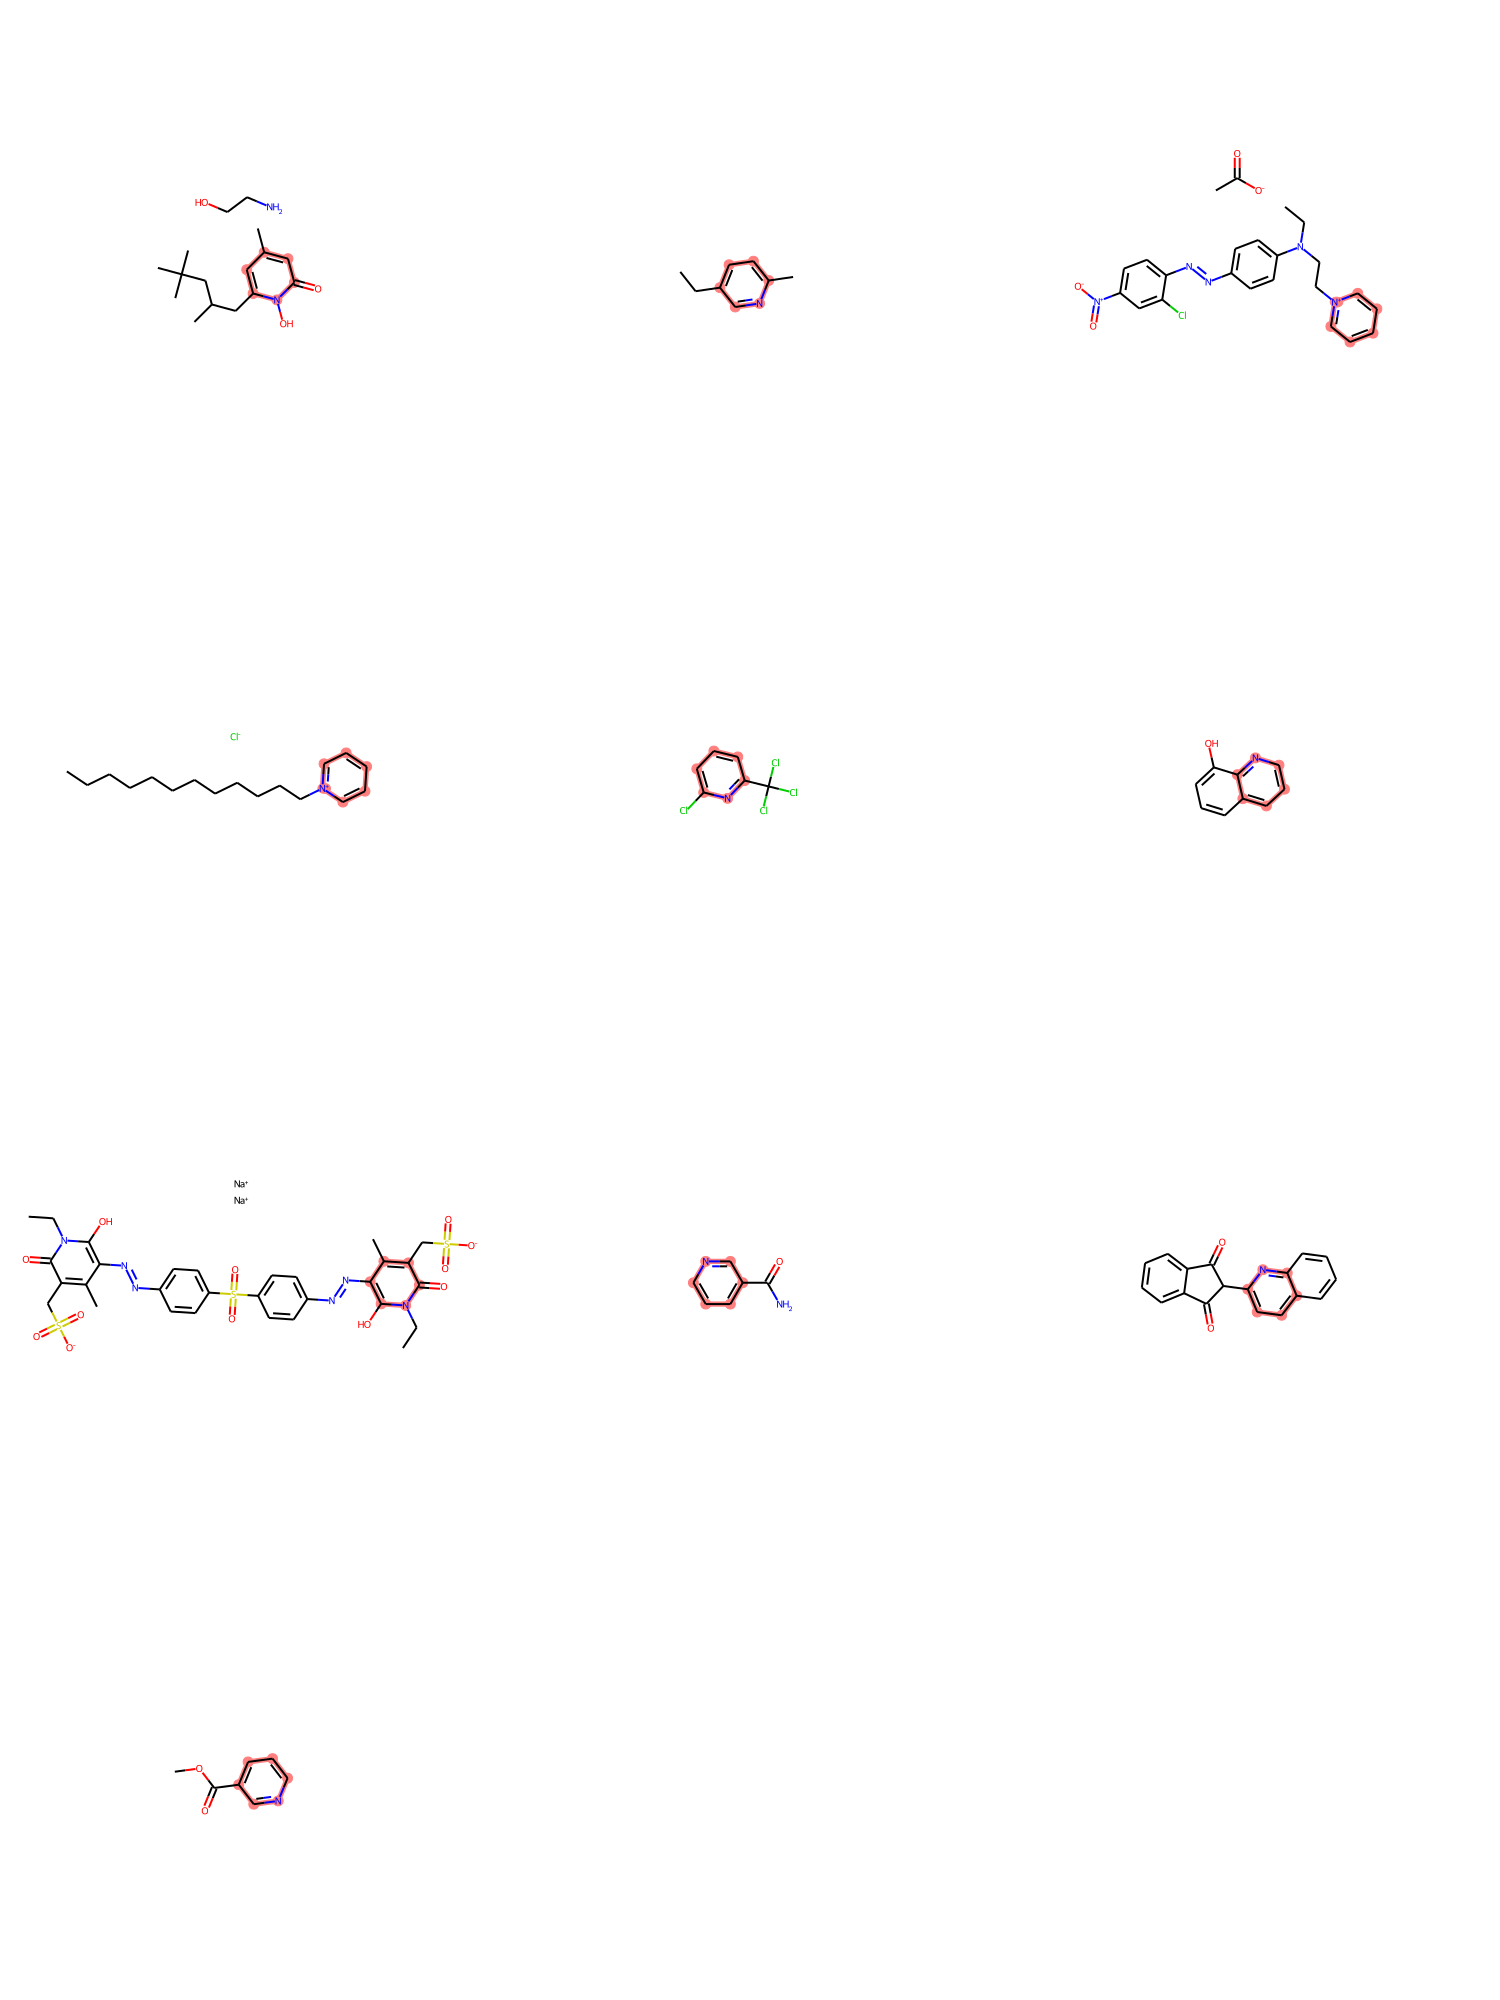

In [102]:
Draw.MolsToGridImage(hits.Mol, 
                     molsPerRow=3, 
                     subImgSize=(500,500), 
                     maxMols=10, 
                     useSVG=True, 
                     highlightAtomLists=match_list)

In [98]:
?Draw.MolsToGridImage

ID                                               Name  \
0  A-3         N,N,N-trimethyloctadecan-1-aminium bromide   
1  A-4                           Benzo[cd]indol-2(1H)-one   
2  A-5                               4-chlorobenzaldehyde   
3  A-8  zinc bis[2-hydroxy-3,5-bis(1-phenylethyl)benzo...   
4  A-9  4-({4-[bis(oxiran-2-ylmethyl)amino]phenyl}meth...   

                                               InChI  \
0  InChI=1S/C21H46N.BrH/c1-5-6-7-8-9-10-11-12-13-...   
1  InChI=1S/C11H7NO/c13-11-8-5-1-3-7-4-2-6-9(12-1...   
2        InChI=1S/C7H5ClO/c8-7-3-1-6(5-9)2-4-7/h1-5H   
3  InChI=1S/2C23H22O3.Zn/c2*1-15(17-9-5-3-6-10-17...   
4  InChI=1S/C25H30N2O4/c1-5-20(26(10-22-14-28-22)...   

                      InChIKey  \
0  SZEMGTQCPRNXEG-UHFFFAOYSA-M   
1  GPYLCFQEKPUWLD-UHFFFAOYSA-N   
2  AVPYQKSLYISFPO-UHFFFAOYSA-N   
3  XTUPUYCJWKHGSW-UHFFFAOYSA-L   
4  FAUAZXVRLVIARB-UHFFFAOYSA-N   

                                              SMILES  Solubility   SD  \
0                [Br-].CCCCCCCCCCCCCCCCCC[N+](C)(C)C   -3.616127  0.0   
1                               O=C1Nc2cccc3cccc1c23   -3.254767  0.0   
2                                    Clc1ccc(C=O)cc1   -2.177078  0.0   
3  [Zn++].CC(c1ccccc1)c2cc(C(C)c3ccccc3)c(O)c(c2)...   -3.924409  0.0   
4  C1OC1CN(CC2CO2)c3ccc(Cc4ccc(cc4)N(CC5CO5)CC6CO...   -4.662065  0.0   

   Ocurrences Group    MolWt  ...  NumAromaticRings  NumSaturatedRings  \
0           1    G1  392.510  ...               0.0                0.0   
1           1    G1  169.183  ...               2.0                0.0   
2           1    G1  140.569  ...               1.0                0.0   
3           1    G1  756.226  ...               6.0                0.0   
4           1    G1  422.525  ...               2.0                4.0   

   NumAliphaticRings  RingCount    TPSA   LabuteASA      BalabanJ  \
0                0.0        0.0    0.00  158.520601  0.000000e+00   
1                1.0        3.0   29.10   75.183563  2.582996e+00   
2                0.0        1.0   17.07   58.261134  3.009782e+00   
3                0.0        6.0  120.72  323.755434  2.322963e-07   
4                4.0        6.0   56.60  183.183268  1.084427e+00   

       BertzCT                                                Mol  Pyridine  
0   210.377334  <img data-content="rdkit/molecule" src="data:i...     False  
1   511.229248  <img data-content="rdkit/molecule" src="data:i...     False  
2   202.661065  <img data-content="rdkit/molecule" src="data:i...     False  
3  1964.648666  <img data-content="rdkit/molecule" src="data:i...     False  
4   769.899934  <img data-content="rdkit/molecule" src="data:i...     False  

[5 rows x 28 columns]
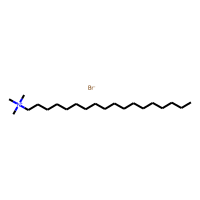
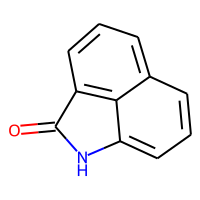
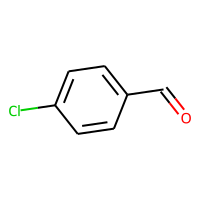
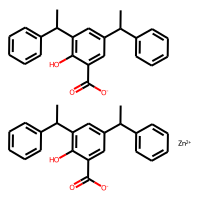
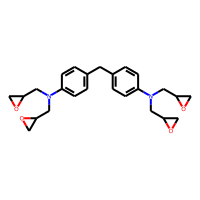

In [153]:
sol_df.head()

In [160]:
smiles_havi = sol_df.SMILES[sol_df.MolWt >= 5000]
smiles_havi

1523    COC(OC)c1ccc(cc1)C(=O)OC.COC(=O)c2ccccc2.COC(=...
Name: SMILES, dtype: object

In [164]:
mols_havi = [Chem.MolFromSmiles(i) for i in smiles_havi]

In [167]:
Havies = pd.DataFrame({"Name": sol_df.Name[sol_df.MolWt >= 5000],
                      "Smile": sol_df.SMILES[sol_df.MolWt >= 5000],
                       "MolWT":sol_df.MolWt[sol_df.MolWt >= 5000],
                      "Mols": mols_havi})

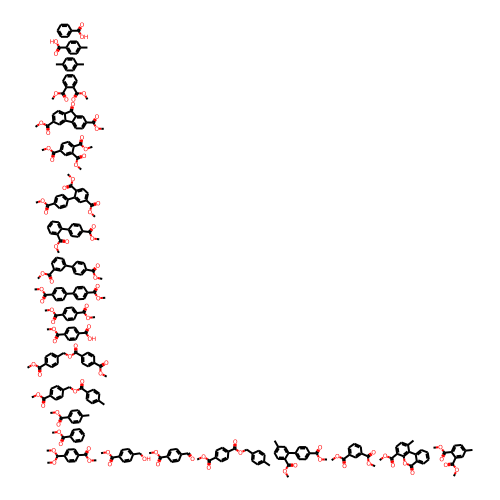

In [180]:
Draw.MolsToGridImage(mols_havi, molsPerRow=1, subImgSize=(500,500), useSVG=True)

In [181]:
Havies.to_csv("havies.csv")

# Exploratory Data Analysis

In [182]:
import seaborn as sns

Seaborn позволяет регулировать свои параметры отображния структру.

In [183]:
help(sns.set)

Help on function set in module seaborn.rcmod:

set(*args, **kwargs)
    Alias for :func:`set_theme`, which is the preferred interface.
    
    This function may be removed in the future.



In [184]:
sns.set(rc={"figure.figsize":(10, 10)}) #rc - параметры которые будут конфигурироваться. 
                                        # данном случае размер изображения

In [185]:
sns.set_style("whitegrid")

In [186]:
sns.set_context("talk")

In [187]:
sol_c_df = pd.read_csv(r"/home/aster/Загрузки/Telegram Desktop/curated-solubility-dataset.csv")

In [192]:
sol_c_df.dtypes

ID                      object
Name                    object
InChI                   object
InChIKey                object
SMILES                  object
Solubility             float64
SD                     float64
Ocurrences               int64
Group                   object
MolWt                  float64
MolLogP                float64
MolMR                  float64
HeavyAtomCount         float64
NumHAcceptors          float64
NumHDonors             float64
NumHeteroatoms         float64
NumRotatableBonds      float64
NumValenceElectrons    float64
NumAromaticRings       float64
NumSaturatedRings      float64
NumAliphaticRings      float64
RingCount              float64
TPSA                   float64
LabuteASA              float64
BalabanJ               float64
BertzCT                float64
dtype: object

Допустим мы хотим отобразить распределение по группам среди хим веществ

In [195]:
sol_c_df.Group.value_counts()

G1    7746
G3    1182
G5     636
G2     235
G4     183
Name: Group, dtype: int64

In [196]:
sol_c_df.Group.value_counts(normalize=True)

G1    0.775997
G3    0.118413
G5    0.063715
G2    0.023542
G4    0.018333
Name: Group, dtype: float64

In [200]:
frame_to_plot = sol_c_df.Group.value_counts().to_frame()
frame_to_plot

Group
G1   7746
G3   1182
G5    636
G2    235
G4    183

<AxesSubplot:>

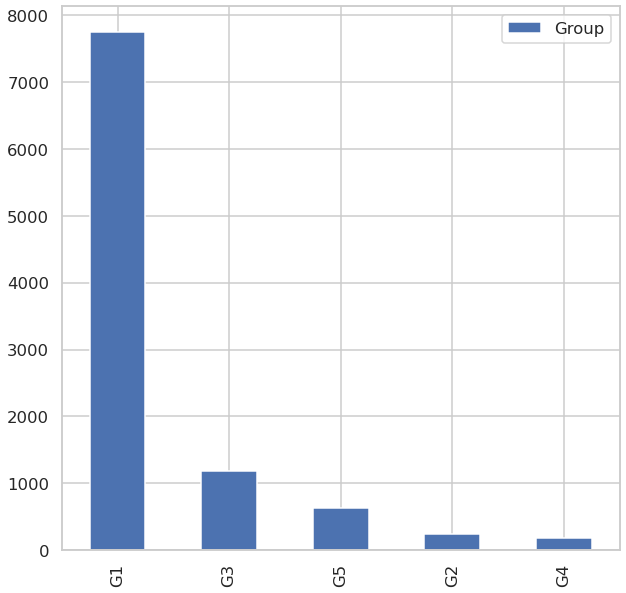

In [211]:
sol_c_df.Group.value_counts().to_frame().plot(kind="bar")

In [235]:
df_ok = sol_c_df.query("Group in ['G3','G5']")
df_ok.shape

(1818, 26)

In [230]:
df_ok

ID                                               Name  \
8     A-14                       bis(4-fluorophenyl)methanone   
9     A-15  1-[2-(benzoyloxy)propoxy]propan-2-yl benzoate ...   
12    A-19  2,3-dimethylphenol; 2,4-dimethylphenol; 2,5-di...   
15    A-23                (2E)-3,7-dimethylocta-2,6-dien-1-ol   
16    A-24         2-(4-chloro-2-methylphenoxy)propanoic acid   
...    ...                                                ...   
9972  I-76                                       sarafloxacin   
9974  I-79                                     sulfamethazine   
9976  I-83                                   sulindac_form_II   
9979  I-86                                             thymol   
9981  I-94                                           warfarin   

                                                  InChI  \
8     InChI=1S/C13H8F2O/c14-11-5-1-9(2-6-11)13(16)10...   
9     InChI=1S/C20H22O5/c21-19(17-9-3-1-4-10-17)24-1...   
12    InChI=1S/6C8H10O/c1-6-3-7(2)5-8(9)4-6;1-6-3-4-...   
15    InChI=1S/C10H18O/c1-9(2)5-4-6-10(3)7-8-11/h5,7...   
16    InChI=1S/C10H11ClO3/c1-6-5-8(11)3-4-9(6)14-7(2...   
...                                                 ...   
9972  InChI=1S/C20H17F2N3O3/c21-12-1-3-13(4-2-12)25-...   
9974  InChI=1S/C12H14N4O2S/c1-8-7-9(2)15-12(14-8)16-...   
9976  InChI=1S/C20H17FO3S/c1-12-17(9-13-3-6-15(7-4-1...   
9979  InChI=1S/C10H14O/c1-7(2)9-5-4-8(3)6-10(9)11/h4...   
9981  InChI=1S/C19H16O4/c1-12(20)11-15(13-7-3-2-4-8-...   

                         InChIKey  \
8     LSQARZALBDFYQZ-UHFFFAOYSA-N   
9     BYQDGAVOOHIJQS-UHFFFAOYSA-N   
12    YJZHZFOWHRKQHS-UHFFFAOYSA-N   
15    GLZPCOQZEFWAFX-YFHOEESVSA-N   
16    WNTGYJSOUMFZEP-UHFFFAOYSA-N   
...                           ...   
9972  XBHBWNFJWIASRO-UHFFFAOYSA-N   
9974  ASWVTGNCAZCNNR-UHFFFAOYSA-N   
9976  MLKXDPUZXIRXEP-RQZCQDPDSA-N   
9979  MGSRCZKZVOBKFT-UHFFFAOYSA-N   
9981  PJVWKTKQMONHTI-UHFFFAOYSA-N   

                                                 SMILES  Solubility        SD  \
8                           Fc1ccc(cc1)C(=O)c2ccc(F)cc2   -4.396652  0.431513   
9                   O=C(OCCCOCCCOC(=O)c1ccccc1)c2ccccc2   -4.595503  0.118551   
12    Cc1ccc(O)c(C)c1.Cc2ccc(C)c(O)c2.Cc3cc(C)cc(O)c...   -1.980310  0.155859   
15                                  CC(C)=CCC\C(C)=C/CO   -2.320601  0.071633   
16                             CC(Oc1ccc(Cl)cc1C)C(O)=O   -2.466031  0.060621   
...                                                 ...         ...       ...   
9972  C1CN(CCN1)c1c(cc2c(n(cc(C(=O)O)c2=O)c2ccc(cc2)...   -3.130000  0.005000   
9974              S(=O)(=O)(Nc1nc(C)cc(n1)C)c1ccc(N)cc1   -2.730000  0.230750   
9976    CC1=C(CC(O)=O)c2cc(F)ccc2C\1=C\c1ccc(cc1)S(C)=O   -4.500000  0.410000   
9979                                c1(cc(ccc1C(C)C)C)O   -2.190000  0.019222   
9981              CC(=O)CC(c1ccccc1)c1c(O)c2ccccc2oc1=O   -4.780000  0.450506   

      Ocurrences Group    MolWt  ...  NumRotatableBonds  NumValenceElectrons  \
8              2    G3  218.202  ...                2.0                 80.0   
9              2    G3  342.391  ...               10.0                132.0   
12             4    G5  733.002  ...                0.0                288.0   
15             4    G5  154.253  ...                4.0                 64.0   
16             4    G5  214.648  ...                3.0                 76.0   
...          ...   ...      ...  ...                ...                  ...   
9972           2    G3  385.370  ...                3.0                144.0   
9974           2    G3  278.337  ...                3.0                100.0   
9976           2    G3  356.418  ...                4.0                128.0   
9979           3    G5  150.221  ...                1.0                 60.0   
9981           3    G5  308.333  ...                4.0                116.0   

      NumAromaticRings  NumSaturatedRings  NumAliphaticRings  RingCount  \
8                  2.0                0.0                0.0    

In [240]:
help(sns.displot)

Help on function displot in module seaborn.distributions:

displot(data=None, *, x=None, y=None, hue=None, row=None, col=None, weights=None, kind='hist', rug=False, rug_kws=None, log_scale=None, legend=True, palette=None, hue_order=None, hue_norm=None, color=None, col_wrap=None, row_order=None, col_order=None, height=5, aspect=1, facet_kws=None, **kwargs)
    Figure-level interface for drawing distribution plots onto a FacetGrid.
    
    This function provides access to several approaches for visualizing the
    univariate or bivariate distribution of data, including subsets of data
    defined by semantic mapping and faceting across multiple subplots. The
    ``kind`` parameter selects the approach to use:
    
    - :func:`histplot` (with ``kind="hist"``; the default)
    - :func:`kdeplot` (with ``kind="kde"``)
    - :func:`ecdfplot` (with ``kind="ecdf"``; univariate-only)
    
    Additionally, a :func:`rugplot` can be added to any kind of plot to show
    individual observations.


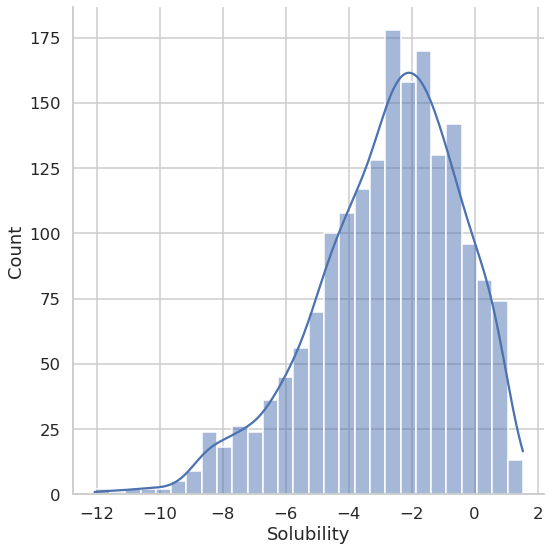

In [239]:
sns.displot(x=df_ok.Solubility, kde=True, height=8) 

График можно костюмизировать.

Например изобразим разлтчие в растворимости

* _>_200 uM -  зеленым
* 30-200 uM - желтым
* <30 uM - красным

In [242]:
import numpy as np

In [245]:
bins = [np.log10(x * 1e-6) for x in [30, 200]]
bins = [-100] + bins + [100]#лист складывается с листом

In [246]:
bins

[-100, -4.522878745280337, -3.6989700043360187, 100]

In [247]:
help(pd.cut)

Help on function cut in module pandas.core.reshape.tile:

cut(x, bins, right: bool = True, labels=None, retbins: bool = False, precision: int = 3, include_lowest: bool = False, duplicates: str = 'raise', ordered: bool = True)
    Bin values into discrete intervals.
    
    Use `cut` when you need to segment and sort data values into bins. This
    function is also useful for going from a continuous variable to a
    categorical variable. For example, `cut` could convert ages to groups of
    age ranges. Supports binning into an equal number of bins, or a
    pre-specified array of bins.
    
    Parameters
    ----------
    x : array-like
        The input array to be binned. Must be 1-dimensional.
    bins : int, sequence of scalars, or IntervalIndex
        The criteria to bin by.
    
        * int : Defines the number of equal-width bins in the range of `x`. The
          range of `x` is extended by .1% on each side to include the minimum
          and maximum values of `x`.
    

In [252]:
df_ok["bin"] = pd.cut(sol_c_df.Solubility, bins=bins, labels=["Low", "Medium", "High"])

/home/aster/anaconda3/envs/rd_kit/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [253]:
df_ok["bins"]

8       Medium
9          Low
12        High
15        High
16        High
         ...  
9972      High
9974      High
9976    Medium
9979      High
9981       Low
Name: bins, Length: 1818, dtype: category
Categories (3, object): ['Low' < 'Medium' < 'High']

In [254]:
color_map_3 = {"Low":"red",
              "Medium": "yellow",
              "High": "green"}

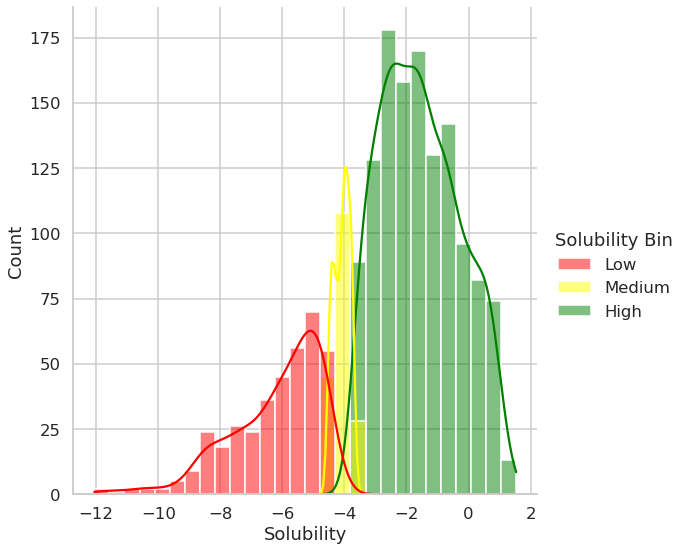

In [260]:
g = sns.displot(x="Solubility", kind="hist", height=8, kde=True,
               hue="bin", data=df_ok, 
               palette=color_map_3)
g.fig.legends[0].set_title("Solubility Bin")